In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
G3_colour = "#6DA9E4"
G2_colour = "#F7D060"
G1_colour = "#917FB3"
GR_colour = "#98D8AA"
ECD_colour = "#FF6D60"

In [67]:
uni = pd.read_csv("20230401 - Masi University Main Sheet.csv")
tl = pd.read_csv("2023 Top Learner  High School - Main -20230120 - NMB High Schools.csv")
children = pd.read_csv("2022 - Children's Results.csv").assign(
    full_sessions = lambda x: x["Total Sessions"] > 30
)

In [68]:
children.columns

Index(['Mcode', 'Schools', 'Centre Type', 'Class', 'Teacher', 'Grade', 'Hub',
       'Surname & Name', 'True Zero Check', 'Ever On Programme',
       'On The Programme', 'On The Programme EOY', 'Pairing Number', 'LC Name',
       'Start Date', 'Total Sessions', 'Jan - Pencil handling',
       'Jan - Picture', 'Jan - Name', 'Jan - Sounds First Letter',
       'Jan - Phonics', 'Jan - Blending', 'Jan - Sight Words',
       'Jan - CVCs Written', 'Jan - Written Words', 'Jan - Sounds Full Word',
       'Jan - Letters Correct', 'Jan - Sentence 1', 'Jan - Sentence 2',
       'Jan - Writing a Story', 'Jan - Total', 'Jan - Total Score %',
       'Jun - Pencil handling', 'Jun - Picture', 'Jun - Name',
       'Jun - Sounds First Letter', 'Jun - Phonics', 'Jun - Blending',
       'Jun - Sight Words', 'Jun - CVCs Written', 'Jun - Written Words',
       'Jun - Sounds Full Word', 'Jun -  Letters Correct (8/29pts)',
       'Jun - Sentence 1', 'Jun - Sentence 2', 'Jun - Writing a Story',
       'Jun - T

In [69]:
children.head(10)

Mcode          Schools Centre Type  Class        Teacher    Grade  \
0   1677      Aaron Gqadu        Both     1A  P.S Salu-Salu  Grade 1   
1   1699      Aaron Gqadu        Both     1A  P.S Salu-Salu  Grade 1   
2   1678      Aaron Gqadu        Both     1A  P.S Salu-Salu  Grade 1   
3   1679      Aaron Gqadu        Both     1A  P.S Salu-Salu  Grade 1   
4   1700      Aaron Gqadu        Both     1A  P.S Salu-Salu  Grade 1   
5   1680      Aaron Gqadu        Both     1A  P.S Salu-Salu  Grade 1   
6   1681      Aaron Gqadu        Both     1A  P.S Salu-Salu  Grade 1   
7   1682      Aaron Gqadu        Both     1A  P.S Salu-Salu  Grade 1   
8   6890   Living Ubuntu          ECD  Pre R        Teacher     PreR   
9   1672      Aaron Gqadu        Both     1A  P.S Salu-Salu  Grade 1   

             Hub      Surname & Name True Zero Check Ever On Programme  ...  \
0      Aaron Hub  Baliso Yangothando             NaN               Yes  ...   
1      Aaron Hub     Bonani Akhanani             NaN               Yes  ...   
2      Aaron Hub          Booi Bukho             NaN                No  ...   
3      Aaron Hub        Chafa Ayanda             NaN                No  ...   
4      Aaron Hub    Chauke Thokozani             NaN               Yes  ...   
5      Aaron Hub      Cobo Inganathi             NaN               Yes  ...   
6      Aaron Hub   Dekile Siphesethu             NaN               Yes  ...   
7      Aaron Hub   Dekile Siphesihle             NaN                No  ...   
8  Sandwater Hub        Jamba Miviwe             NaN               Yes  ...   
9      Aaron Hub      Dyoba Iyonakha             NaN               Yes  ...   

  Nov - Letters Correct Nov - Sentence 1  Nov - Sentence 2  \
0                  22.0             14.0              21.0   
1                  23.0             15.0              28.0   
2                  10.0              6.0               4.0   
3                   NaN              NaN               NaN   
4                  25.0             21.0              29.0   
5                  24.0             16.0              19.0   
6                  10.0              0.0               0.0   
7                   0.0              1.0               0.0   
8                   NaN              NaN               NaN   
9                  20.0             15.0              22.0   

  Nov - Writing a Story Nov - Total  Nov - Total Score % Jan Assessment  \
0                   5.0       112.0                  48%            Yes   
1                   8.0       167.0                  72%            Yes   
2                   4.0        47.0                  20%            Yes   
3                   NaN         NaN                  NaN            Yes   
4                  10.0       184.0                  80%            Yes   
5                  10.0       138.0                  60%            Yes   
6                   0.0        25.0                  11%            Yes   
7                   0.0        10.0                   4%            Yes   
8                   NaN         NaN                  NaN            NaN   
9                   8.0       121.0                  52%            Yes   

   June Assessment  Nov Assessment  full_sessions  
0          Missing             Yes           True  
1              Yes             Yes           True  
2    No Assessment             Yes          False  
3    No Assessment         Missing          False  
4              Yes             Yes           True  
5              Yes             Yes           True  
6          Missing             Yes           True  
7    No Assessment             Yes          False  
8              NaN             NaN           True  
9              Yes             Yes           True  

[10 rows x 68 columns]

## Calculating Improvement Columns

In [70]:
children["Jan - Sounds and Phonics"] =  children["Jan - Sounds First Letter"] + children["Jan - Phonics"]
children["Nov - Sounds and Phonics"] =  children["Nov - Sounds First Letter"] + children["Nov - Phonics"]
children["Sounds and Phonics Improvement"] = children["Nov - Sounds and Phonics"] - children["Jan - Sounds and Phonics"]
children["Jan - Setence Total"] = children["Jan - Sentence 1"] + children["Jan - Sentence 2"]
children["Nov - Sentence Total"] = children["Nov - Sentence 1"] + children["Nov - Sentence 2"]
children["First Sounds Improvement"] = children["Nov - Sounds First Letter"] - children["Jan - Sounds First Letter"]
children["Phonics Improvement"] = children["Nov - Phonics"] - children["Jan - Phonics"]
children["Sight Words Improvement"] = children["Nov - Sight Words"] - children["Jan - Sight Words"]
children["Letters Improvement"] = children["Nov - Letters Correct"] - children["Jan - Letters Correct"]
children["Sentence Improvement"] = children["Nov - Sentence Total"] - children["Jan - Setence Total"]
children["Total Improvement"] = children["Nov - Total"] - children["Jan - Total"]
children['Ever On Programme w Grads'] = children['Ever On Programme'].apply(lambda x: 'Yes' if x == 'Yes' or x == 'Graduated' else 'No')

improvement_columns = ["First Sounds Improvement","Phonics Improvement","Sight Words Improvement", "Letters Improvement", "Sentence Improvement", "Total Improvement" ]

## Creating our Group By Objects (GBOs)
- N.B. I'm using the Grade column to distinguish ECD children vs Primary b/c of the schools that have 'Both'. Might be susceptible to errors, so confirm data is correct.
- Four objects created
    1. Primary School - On Programme
    2. Primary School - Not On Programme
    3. ECD - On Programme
    4. ECD - Not On Programme

In [71]:
# We are excluding our graduates from all of these
on_programme_primary = children[(children['On The Programme EOY'] == "Yes") & (children['Grade'] != "PreR") & (children['Ever On Programme'] != "Graduated")]
on_primary = on_programme_primary.groupby("Schools")
not_programme_primary = children[(children['On The Programme EOY'] == "No") & (children['Centre Type'] != "ECD") & (children['Ever On Programme'] != "Graduated")]
not_primary = on_programme_primary.groupby("Schools")
on_programme_ecd = children[(children['On The Programme EOY'] == "Yes") & (children['Grade'] == "PreR")]
on_ecd = on_programme_ecd.groupby("Schools")
not_programme_ecd = children[(children['On The Programme EOY'] == "No") & (children['Grade'] == "PreR") & (children['Ever On Programme'] != "Graduated")]
not_ecd = on_programme_ecd.groupby("Schools")
on_programme_R = children[(children['On The Programme EOY'] == "Yes") & (children['Grade'] == "Grade R")]
on_R = on_programme_R.groupby("Schools")
not_programme_R = children[(children['On The Programme EOY'] == "No") & (children['Grade'] == "Grade R") & (children['Ever On Programme'] != "Graduated")]
not_R = not_programme_R.groupby("Schools")
on_programme_1 = children[(children['On The Programme EOY'] == "Yes") & (children['Grade'] == "Grade 1")]
on_1 = on_programme_1.groupby("Schools")
not_programme_1 = children[(children['On The Programme EOY'] == "No") & (children['Grade'] == "Grade 1") & (children['Ever On Programme'] != "Graduated")]
not_1 = not_programme_1.groupby("Schools")
on_programme_2 = children[(children['On The Programme EOY'] == "Yes") & (children['Grade'] == "Grade 2")]
on_2 = on_programme_2.groupby("Schools")
not_programme_2 = children[(children['On The Programme EOY'] == "No") & (children['Grade'] == "Grade 2") & (children['Ever On Programme'] != "Graduated")]
not_2 = not_programme_2.groupby("Schools")
on_programme_3 = children[(children['On The Programme EOY'] == "Yes") & (children['Grade'] == "Grade 3")]
on_3 = on_programme_3.groupby("Schools")
not_programme_3 = children[(children['On The Programme EOY'] == "No") & (children['Grade'] == "Grade 3") & (children['Ever On Programme'] != "Graduated")]
not_3 = not_programme_3.groupby("Schools")
all_ECD = children[children['Grade'] == "PreR"]
all_Primary = children[(children['Grade'] != "PreR") & (children['Ever On Programme'] != "Graduated")]
all_Primary_all = children[(children['Grade'] != "PreR")]


#graduates included below. When we are comparing total scores for kids on the programme vs graduated out of the programme, we want to include our grads.
all_R = children[children['Grade'] == "Grade R"]
all_1 = children[children['Grade'] == "Grade 1"]
all_2 = children[children['Grade'] == "Grade 2"]
all_3 = children[children['Grade'] == "Grade 3"]
all_ECD_R = pd.concat([all_ECD, all_R])
on_programme_primary_grads = children[(children['On The Programme EOY'] == "Yes") & (children['Grade'] != "PreR")]
on_primary_grads = on_programme_primary_grads.groupby("Schools")

# Programme Impact

### 2022 Total Scores

Text(0.5, 1.0, 'Primary School Scores for Children on Programme')

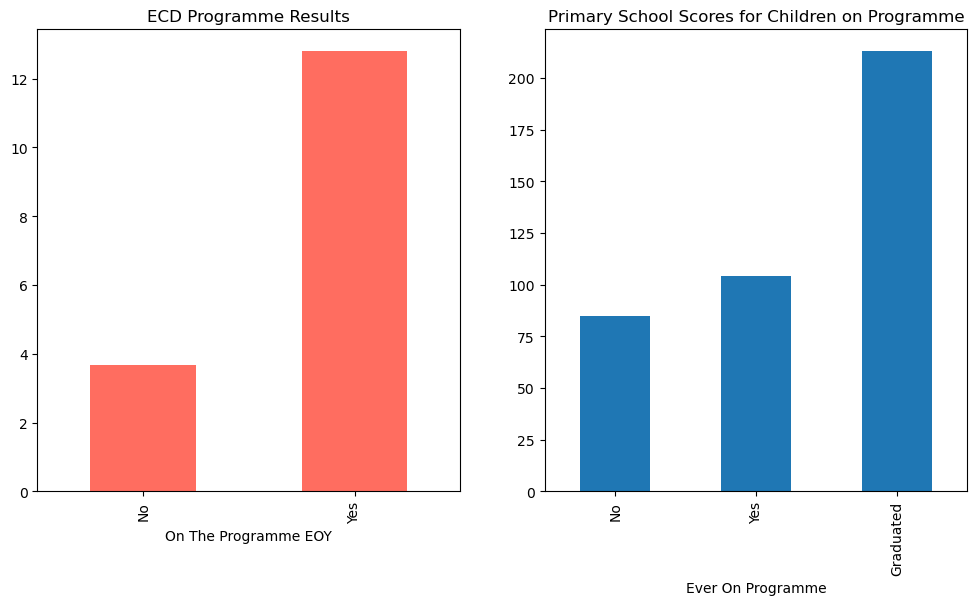

In [6]:
# The following recaptures all primary, but includes previous grads
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("ECD Programme Results")
plt.xlabel("Children On The Programme")
all_ECD.groupby("On The Programme EOY")["Nov - Total"].mean().plot(kind="bar", color=ECD_colour)
plt.subplot(1,2,2)
All_Primary_Agg = children[children['Grade'] != "PreR"]
All_Primary_Agg.groupby("Ever On Programme")["Nov - Total"].mean().sort_values().plot(kind="bar")
plt.title("Primary School Scores for Children on Programme")

In [83]:
df = all_ECD.groupby("On The Programme EOY")["Nov - Phonics"].mean().reset_index()

fig = px.bar(df, x='On The Programme EOY', y='Nov - Phonics', color='Nov - Phonics')

fig.show()


In [86]:
All_Primary_Agg = children[children['Grade'] != "PreR"]
df = All_Primary_Agg.groupby("Ever On Programme")["Nov - Total"].mean().reset_index().sort_values(by='Nov - Total')

fig = px.bar(df, x='Ever On Programme', y='Nov - Total', color='Nov - Total')

fig.show()


### 2022 Improvement Results

<AxesSubplot:title={'center':'Primary School Improvement'}, xlabel='On The Programme EOY'>

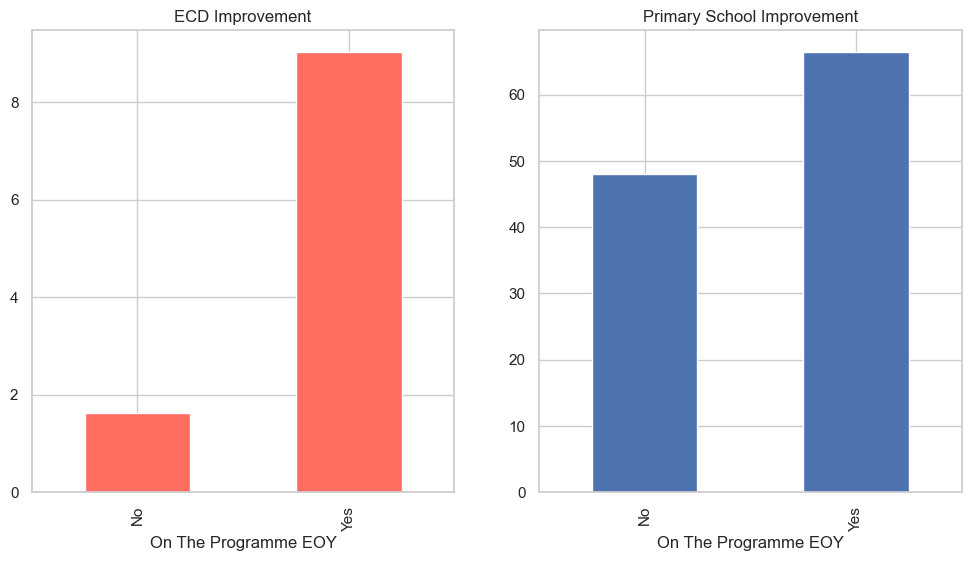

In [128]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("ECD Improvement")
plt.xlabel("Children On The Programme")
all_ECD.groupby("On The Programme EOY")["Total Improvement"].mean().plot(kind="bar", color=ECD_colour)
plt.subplot(1,2,2)
plt.title("Primary School Improvement")
plt.xlabel("Children On The Programme")
all_Primary.groupby("On The Programme EOY")["Total Improvement"].mean().plot(kind="bar")

# Progress of Children on the Programme

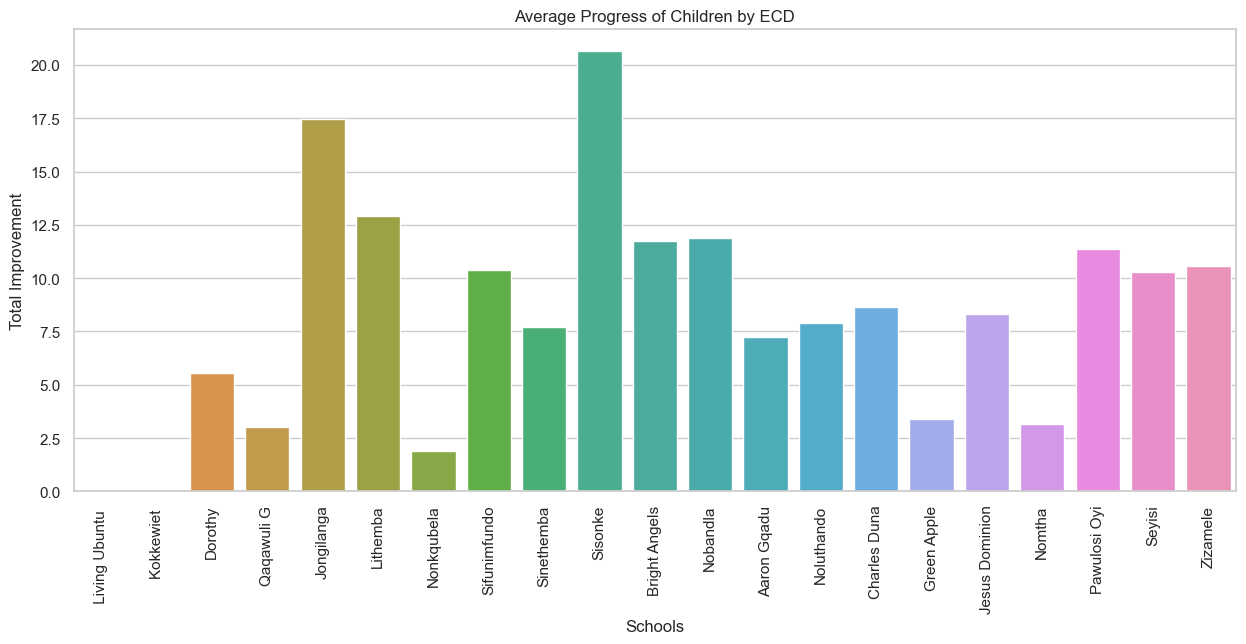

In [129]:
fig, ax = plt.subplots(figsize=(15, 6));

# Using the 'order' parameter to sort the bars based on the sorted_schools
sns.barplot(data=on_programme_ecd, x='Schools', y='Total Improvement', ci=None, ax=ax);
plt.title("Average Progress of Children by ECD");
plt.xticks(rotation=90);

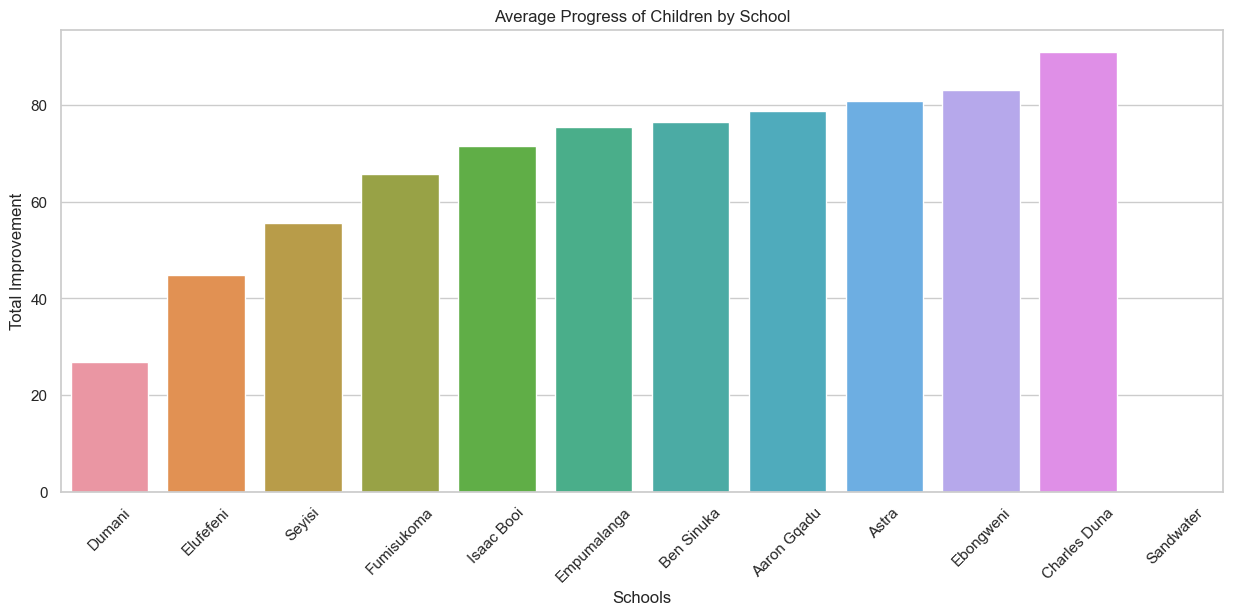

In [182]:
# Create a wide figure with a custom figsize (width, height)
fig, ax = plt.subplots(figsize=(15, 6));

avg_improvement = on_programme_primary.groupby(['Schools'])['Total Improvement'].mean().sort_values().index


# Using the 'order' parameter to sort the bars based on the sorted_schools
sns.barplot(data=on_programme_primary, x='Schools', y='Total Improvement', ci=None, ax=ax, order=avg_improvement);
plt.title("Average Progress of Children by School");
plt.xticks(rotation=45);

# Progress of Children NOT on the programme
### This is an interesting way of comparing schools

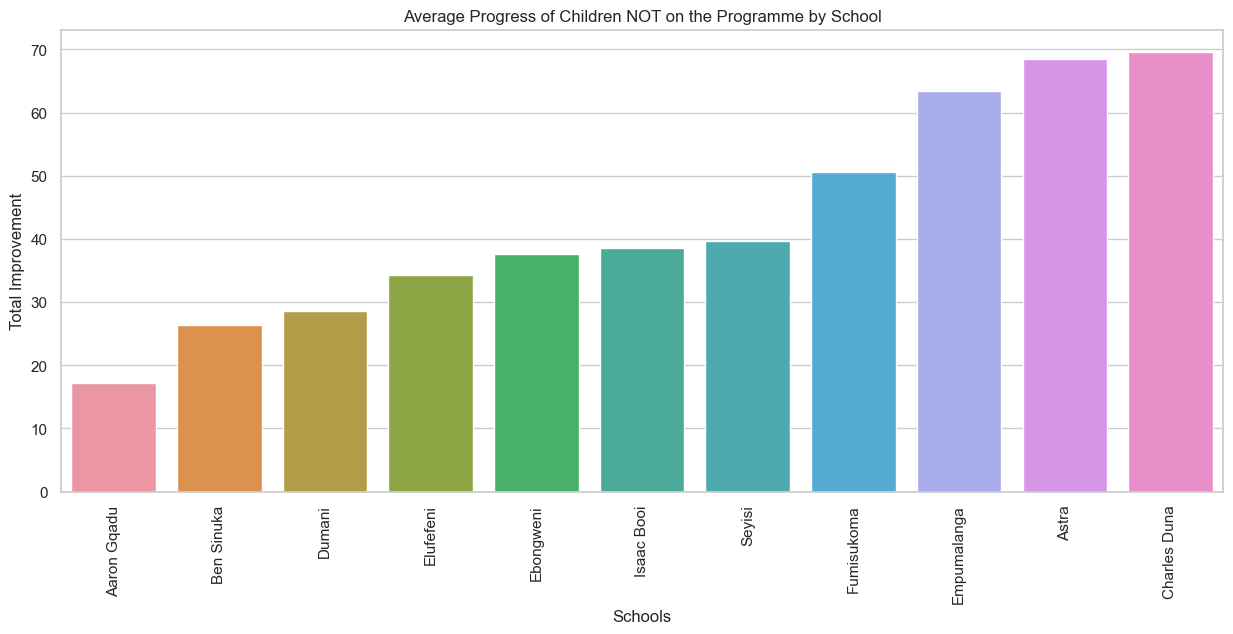

In [181]:
# Calculate the average total improvement for each school based on the 'On The Programme EOY' column
avg_improvement = not_programme_primary.groupby(['Schools'])['Total Improvement'].mean().sort_values().index


# Create a wide figure with a custom figsize (width, height)
fig, ax = plt.subplots(figsize=(15, 6))

# Using the 'order' parameter to sort the bars based on the sorted_schools
sns.barplot(data=not_programme_primary, x='Schools', y='Total Improvement', ci=None, ax=ax, order=avg_improvement)
plt.title("Average Progress of Children NOT on the Programme by School")
plt.xticks(rotation=90)
plt.show();

# Effectiveness of Our Programme per School
### This is measuring the gap between growth of kids on and off the programme per school

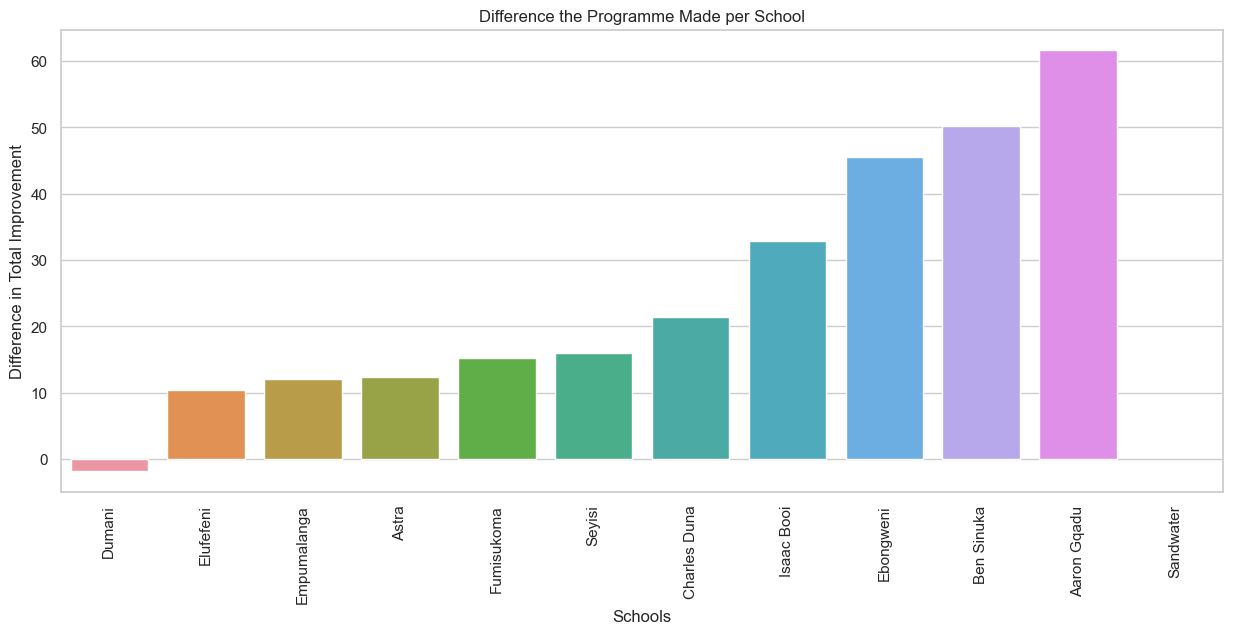

In [192]:
# Calculate the mean 'Total Improvement' per school for each group
on_programme_means = on_programme_primary.groupby('Schools')['Total Improvement'].mean()
not_programme_means = not_programme_primary.groupby('Schools')['Total Improvement'].mean()

# Combine the two resulting DataFrames
combined_means = pd.concat([on_programme_means, not_programme_means], axis=1)
combined_means.columns = ['On Programme', 'Not On Programme']

# Calculate the difference in the mean 'Total Improvement' for each school
combined_means['Difference'] = combined_means['On Programme'] - combined_means['Not On Programme']

# Sort the differences
sorted_differences = combined_means['Difference'].sort_values()

# Create a bar plot of the differences
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=sorted_differences.index, y=sorted_differences.values, ax=ax)
plt.title("Difference the Programme Made per School")
plt.xlabel("Schools")
plt.ylabel("Difference in Total Improvement")
plt.xticks(rotation=90)
plt.show()


### Plotly version

In [201]:
pip install chart_studio


     -------------------------------------- 64.4/64.4 kB 173.1 kB/s eta 0:00:00
  Using cached retrying-1.3.4-py3-none-any.whl (11 kB)


In [1]:
#Same thing, but in plotly
import plotly.graph_objects as go
import chart_studio
import chart_studio.plotly as py

chart_studio.tools.set_credentials_file(username='masinyusane', api_key='kgAp96FOaJl4J0pNYmej')


# Calculate the mean 'Total Improvement' per school for each group
on_programme_means = on_programme_primary.groupby('Schools')['Total Improvement'].mean()
not_programme_means = not_programme_primary.groupby('Schools')['Total Improvement'].mean()

# Combine the two resulting DataFrames
combined_means = pd.concat([on_programme_means, not_programme_means], axis=1)
combined_means.columns = ['On Programme', 'Not On Programme']

# Calculate the difference in the mean 'Total Improvement' for each school
combined_means['Difference'] = combined_means['On Programme'] - combined_means['Not On Programme']

# Sort the differences
sorted_differences = combined_means['Difference'].sort_values()

# Create a bar plot of the differences
fig = go.Figure(go.Bar(x=sorted_differences.index, y=sorted_differences.values))

fig.update_layout(
    title="Difference the Programme Made per School",
    xaxis_title="Schools",
    yaxis_title="Difference in Total Improvement",
    xaxis_tickangle=-90,
)

py.plot(fig, filename='Programme Impact Per School', auto_open=False)

fig.show()


NameError: name 'on_programme_primary' is not defined

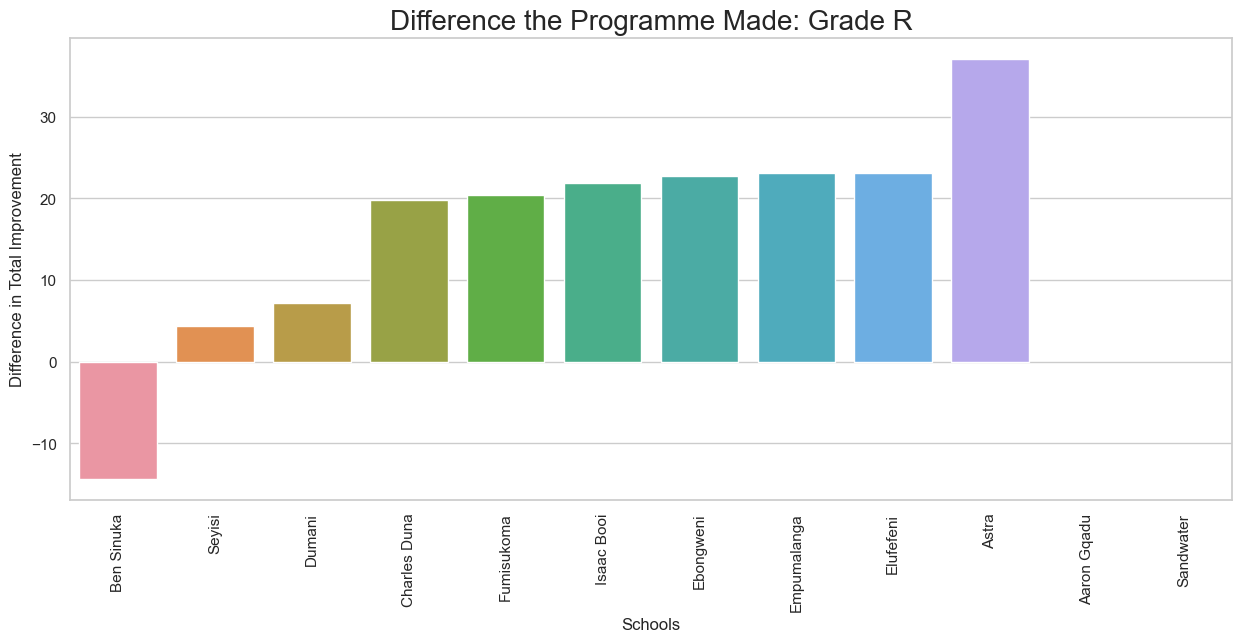

In [194]:
# Calculate the mean 'Total Improvement' per school for each group
on_programme_means = on_R['Total Improvement'].mean()
not_programme_means = not_R['Total Improvement'].mean()

# Combine the two resulting DataFrames
combined_means = pd.concat([on_programme_means, not_programme_means], axis=1)
combined_means.columns = ['On Programme', 'Not On Programme']

# Calculate the difference in the mean 'Total Improvement' for each school
combined_means['Difference'] = combined_means['On Programme'] - combined_means['Not On Programme']

# Sort the differences
sorted_differences = combined_means['Difference'].sort_values()

# Create a bar plot of the differences
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=sorted_differences.index, y=sorted_differences.values, ax=ax)
plt.title("Difference the Programme Made: Grade R", fontsize=20)
plt.xlabel("Schools")
plt.ylabel("Difference in Total Improvement")
plt.xticks(rotation=90)
plt.show()

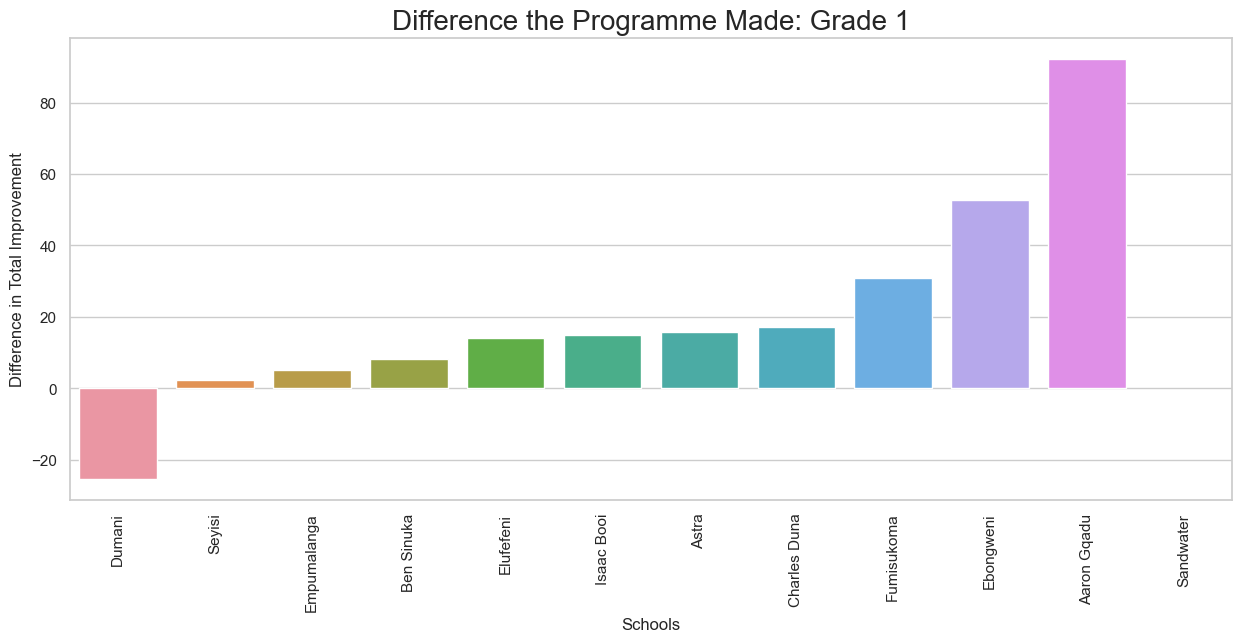

In [195]:
# Calculate the mean 'Total Improvement' per school for each group
on_programme_means = on_1['Total Improvement'].mean()
not_programme_means = not_1['Total Improvement'].mean()

# Combine the two resulting DataFrames
combined_means = pd.concat([on_programme_means, not_programme_means], axis=1)
combined_means.columns = ['On Programme', 'Not On Programme']

# Calculate the difference in the mean 'Total Improvement' for each school
combined_means['Difference'] = combined_means['On Programme'] - combined_means['Not On Programme']

# Sort the differences
sorted_differences = combined_means['Difference'].sort_values()

# Create a bar plot of the differences
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=sorted_differences.index, y=sorted_differences.values, ax=ax)
plt.title("Difference the Programme Made: Grade 1", fontsize=20)
plt.xlabel("Schools")
plt.ylabel("Difference in Total Improvement")
plt.xticks(rotation=90)
plt.show()

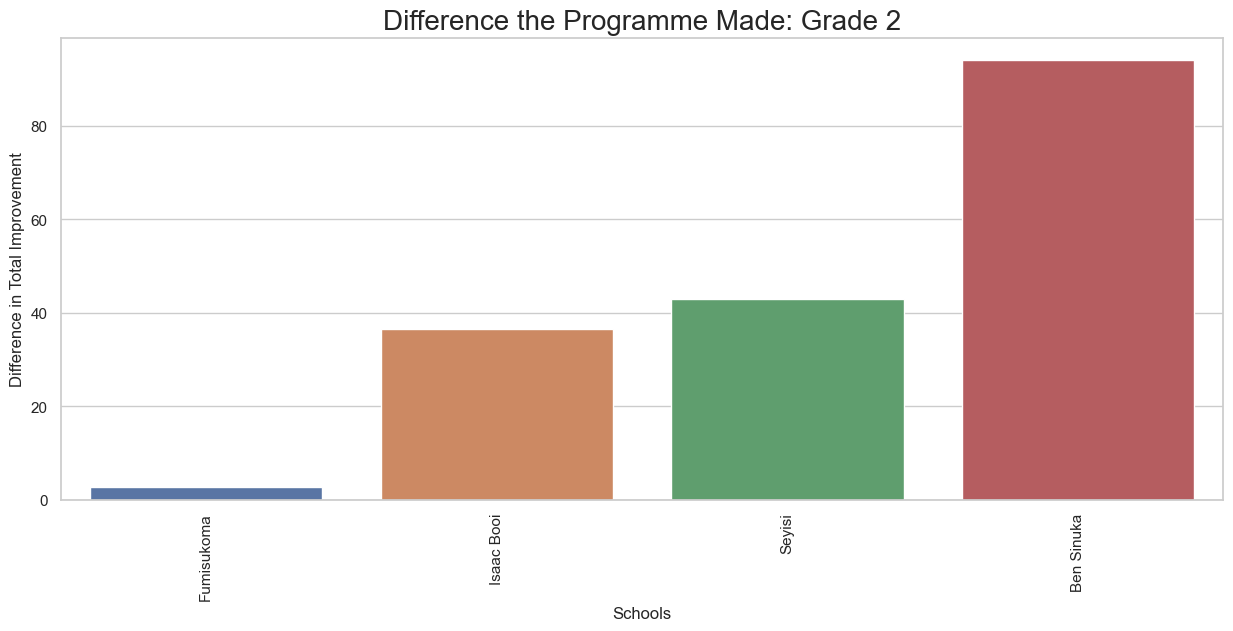

In [196]:
# Calculate the mean 'Total Improvement' per school for each group
on_programme_means = on_2['Total Improvement'].mean()
not_programme_means = not_2['Total Improvement'].mean()

# Combine the two resulting DataFrames
combined_means = pd.concat([on_programme_means, not_programme_means], axis=1)
combined_means.columns = ['On Programme', 'Not On Programme']

# Calculate the difference in the mean 'Total Improvement' for each school
combined_means['Difference'] = combined_means['On Programme'] - combined_means['Not On Programme']

# Sort the differences
sorted_differences = combined_means['Difference'].sort_values()

# Create a bar plot of the differences
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=sorted_differences.index, y=sorted_differences.values, ax=ax)
plt.title("Difference the Programme Made: Grade 2", fontsize=20)
plt.xlabel("Schools")
plt.ylabel("Difference in Total Improvement")
plt.xticks(rotation=90)
plt.show()

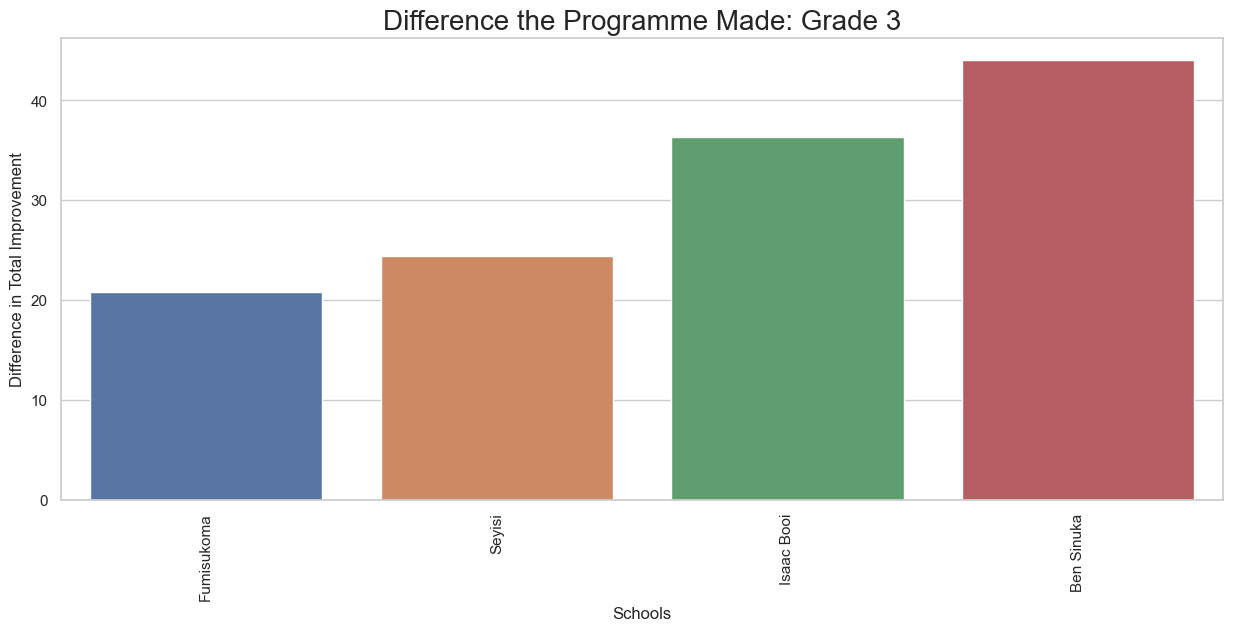

In [197]:
# Calculate the mean 'Total Improvement' per school for each group
on_programme_means = on_3['Total Improvement'].mean()
not_programme_means = not_3['Total Improvement'].mean()

# Combine the two resulting DataFrames
combined_means = pd.concat([on_programme_means, not_programme_means], axis=1)
combined_means.columns = ['On Programme', 'Not On Programme']

# Calculate the difference in the mean 'Total Improvement' for each school
combined_means['Difference'] = combined_means['On Programme'] - combined_means['Not On Programme']

# Sort the differences
sorted_differences = combined_means['Difference'].sort_values()

# Create a bar plot of the differences
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=sorted_differences.index, y=sorted_differences.values, ax=ax)
plt.title("Difference the Programme Made: Grade 3", fontsize=20)
plt.xlabel("Schools")
plt.ylabel("Difference in Total Improvement")
plt.xticks(rotation=90)
plt.show()

# Progress Comparison of Children On vs Off the Programme

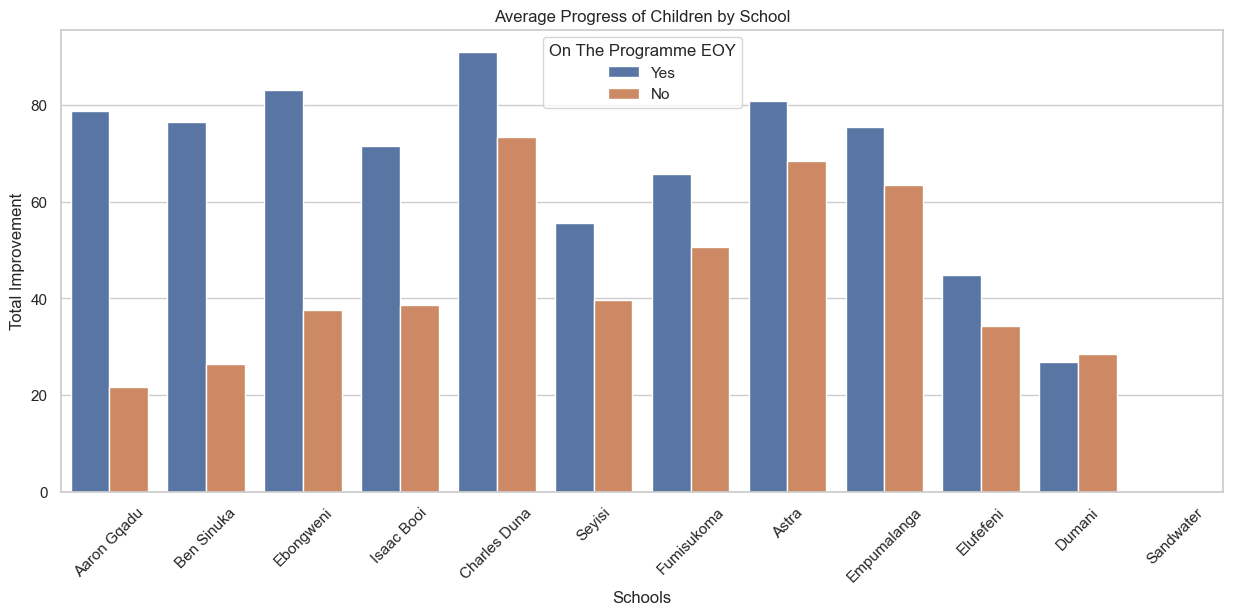

In [131]:
# Calculate the average total improvement for each school based on the 'On The Programme EOY' column
avg_improvement = all_Primary.groupby(['Schools', 'On The Programme EOY'])['Total Improvement'].mean().unstack()

# Calculate the difference between the average values per school of the hue
avg_improvement['difference'] = avg_improvement.max(axis=1) - avg_improvement.min(axis=1)

# Sort the schools by the largest differences
sorted_schools = avg_improvement['difference'].sort_values(ascending=False).index

# Create a wide figure with a custom figsize (width, height)
fig, ax = plt.subplots(figsize=(15, 6))

# Using the 'order' parameter to sort the bars based on the sorted_schools
sns.barplot(data=all_Primary, x='Schools', y='Total Improvement', hue='On The Programme EOY', ci=None, ax=ax, order=sorted_schools)
plt.title("Average Progress of Children by School")
plt.xticks(rotation=45)
plt.show();


# Total Scores per School
### This gives insight into which schools are performing the best by end of Grade 3

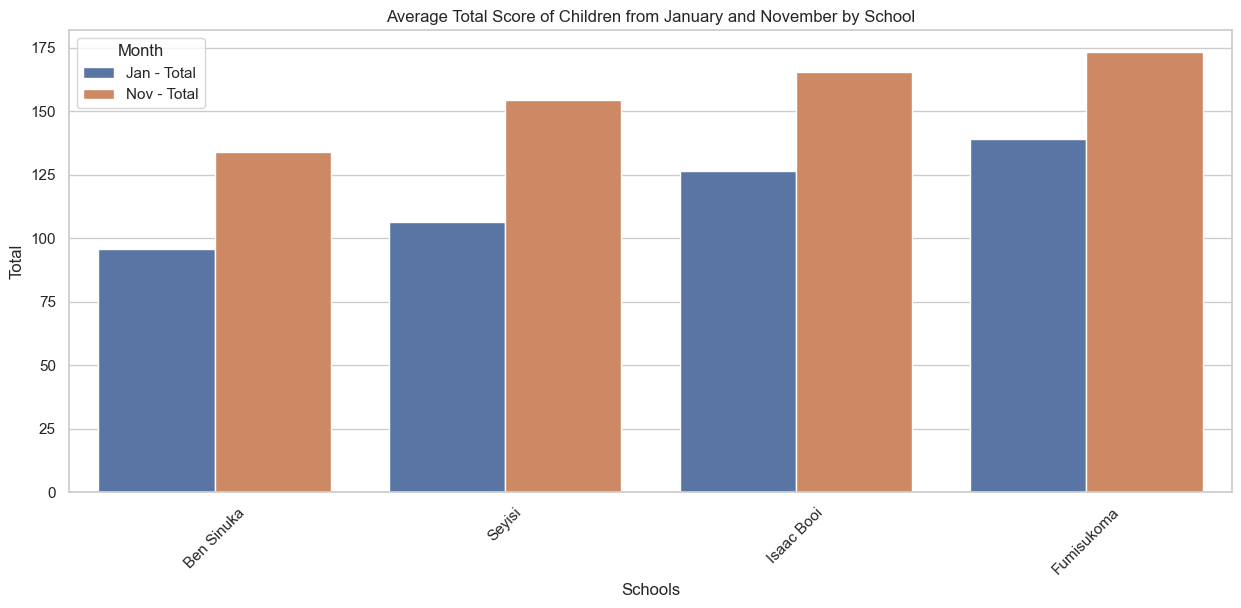

In [132]:
# Reshape the dataframe using the melt function
df_melted = all_3.melt(id_vars=['Schools'], value_vars=['Jan - Total', 'Nov - Total'], var_name='Month', value_name='Total')

# Calculate the average total score for each school in January and November
sorted_schools = df_melted.groupby(['Schools', 'Month'])['Total'].mean().unstack().sort_values(by='Nov - Total').index

# Create a new figure with a custom figsize (width, height)
fig, ax = plt.subplots(figsize=(15, 6))

# Use the 'hue' parameter to differentiate between January and November scores
sns.barplot(data=df_melted, x='Schools', y='Total', hue='Month', ci=None, ax=ax, order=sorted_schools)
plt.title("Average Total Score of Children from January and November by School")
plt.xticks(rotation=45)
plt.show();

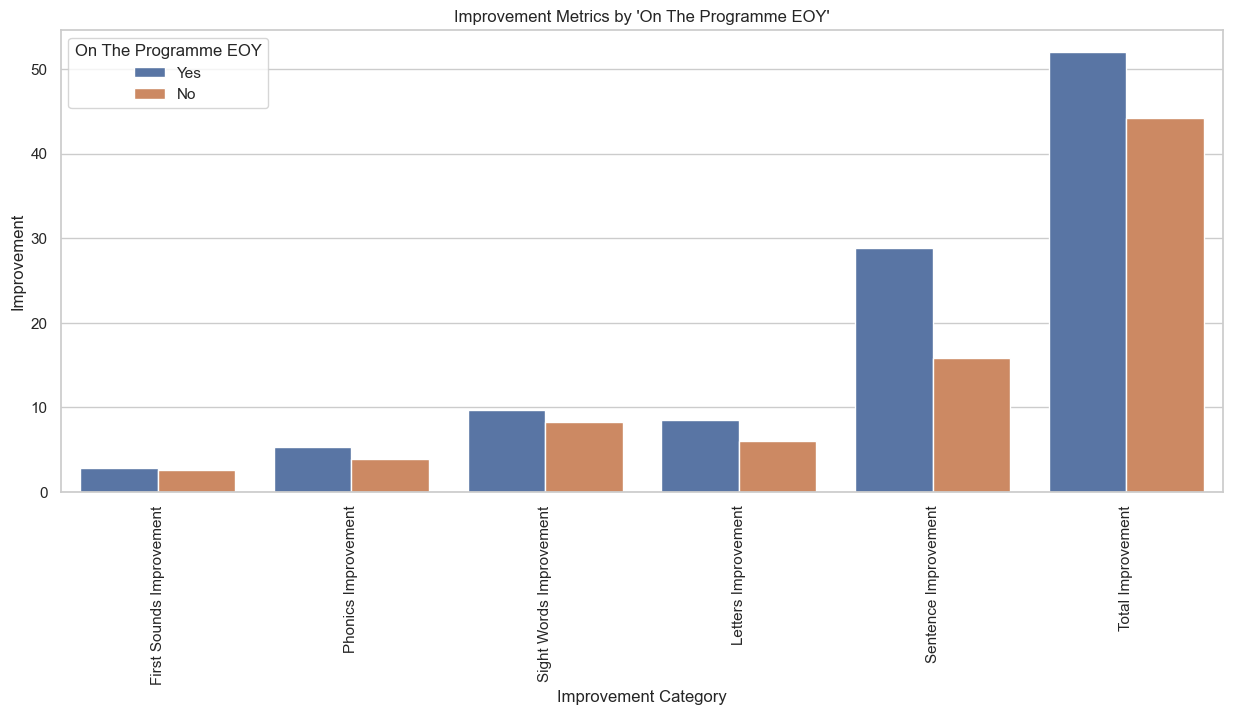

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# List of improvement columns
improvement_columns = [
    "First Sounds Improvement",
    "Phonics Improvement",
    "Sight Words Improvement",
    "Letters Improvement",
    "Sentence Improvement",
    "Total Improvement",
]

# Melt the DataFrame into a long format
long_format = children.melt(
    id_vars=["On The Programme EOY"],
    value_vars=improvement_columns,
    var_name="Improvement Category",
    value_name="Improvement",
)

# Create a bar chart using Seaborn
plt.figure(figsize=(15, 6))
sns.barplot(data=long_format, x="Improvement Category", y="Improvement", hue="On The Programme EOY", ci=None)
plt.title("Improvement Metrics by 'On The Programme EOY'")
plt.xticks(rotation=90)
plt.show()


## Generate PDF per ECDC

In [2]:
preR_schools = children[children['Grade'] == "PreR"]['Schools'].unique()

for school in preR_schools:
    school_data = long_format[(long_format["Schools"] == school) & (long_format["Grade"] == "PreR")].copy()
    
    with PdfPages(f"{school}_performance_metrics.pdf") as pdf:
        fig, ax = plt.subplots(figsize=(6, 4))
        fig.suptitle(f"Improvement Metrics for {school}", fontsize=16)
        sns.barplot(data=school_data, x="Improvement Category", y="Improvement", hue="On The Programme EOY",hue_order=["No", "Yes"], ci=None, ax=ax, palette=palette)
        ax.set_xlabel("Improvement Category")
        ax.set_ylabel("Improvement")
        ax.tick_params(axis="x", rotation=45)
        plt.tight_layout()
        plt.subplots_adjust(top=0.85)
        pdf.savefig(fig, bbox_inches='tight')
        plt.close()


NameError: name 'children' is not defined

## Generate PDFs per School

In [135]:
other_grades_schools = children[children['Grade'] != "PreR"]['Schools'].unique()

for school in other_grades_schools:
    school_data = long_format[(long_format["Schools"] == school) & (long_format["Grade"] != "PreR")].copy()
    
    with PdfPages(f"{school}_performance_metrics.pdf") as pdf:
        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12), sharey=True)
        fig.suptitle(f"Improvement Metrics per Grade for {school}", fontsize=16)

        axes = axes.flatten()
        other_grades = school_data["Grade"].unique()

        for grade, ax in zip(other_grades, axes):
            grade_data = school_data[school_data["Grade"] == grade]
            sns.barplot(data=grade_data, x="Improvement Category", y="Improvement", hue="On The Programme EOY", hue_order=["No", "Yes"], ci=None, ax=ax, palette=palette)
            ax.set_title(grade)
            ax.set_xlabel("")
            ax.set_ylabel("")

        axes[0].set_ylabel("Improvement")
        axes[2].set_ylabel("Improvement")

        fig.text(0.5, 0.04, "Improvement Category", ha="center", fontsize=14)

        for ax in axes:
            ax.tick_params(axis="x", rotation=45)

        plt.tight_layout()
        plt.subplots_adjust(top=0.9)
        pdf.savefig(fig, bbox_inches='tight')
        plt.close()


KeyError: 'Schools'

## Improvement Per Section

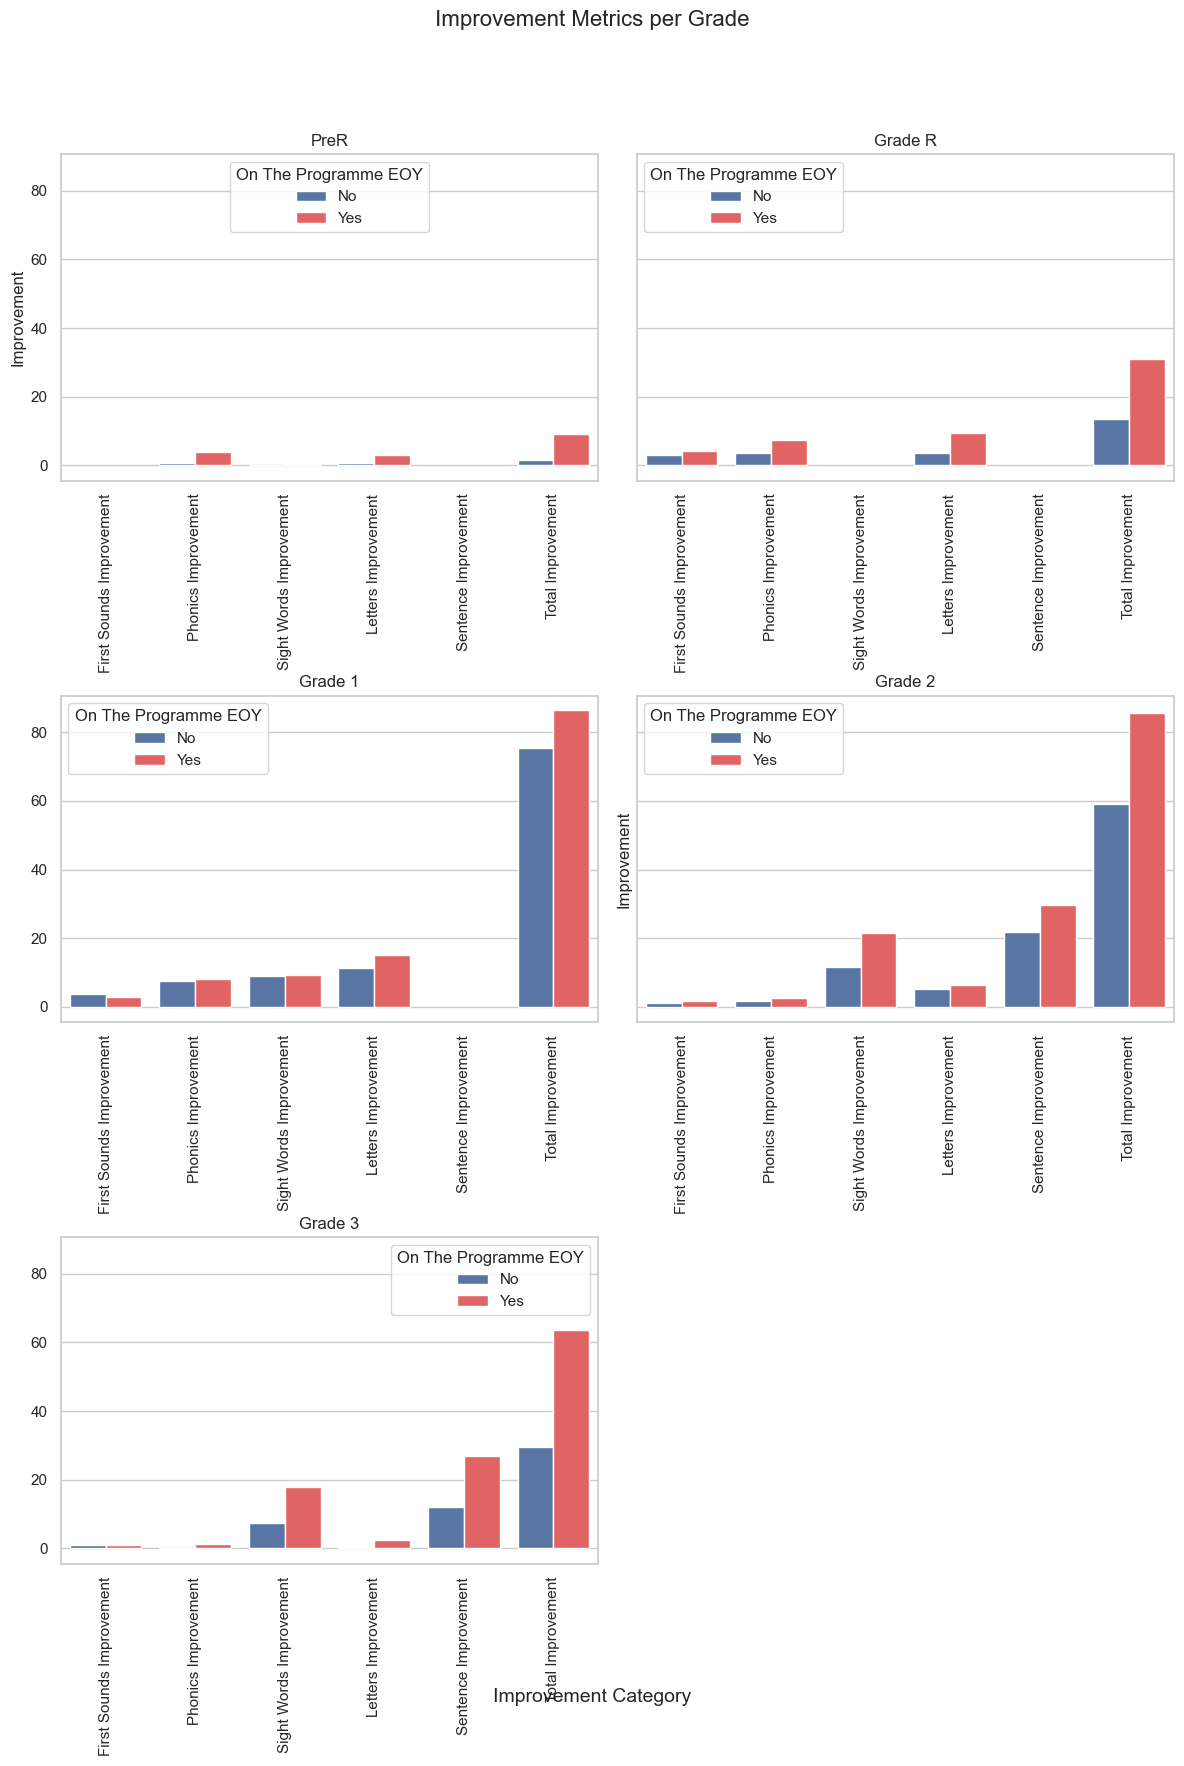

In [198]:
# List of improvement columns
improvement_columns = [
    "First Sounds Improvement",
    "Phonics Improvement",
    "Sight Words Improvement",
    "Letters Improvement",
    "Sentence Improvement",
    "Total Improvement",
]

# Melt the DataFrame into a long format
long_format = children.melt(
    id_vars=["On The Programme EOY", "Grade"],
    value_vars=improvement_columns,
    var_name="Improvement Category",
    value_name="Improvement",
)

grades = ["PreR", "Grade R", "Grade 1", "Grade 2", "Grade 3"]

# Create a subplot grid with 2 rows and 3 columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 18), sharey=True)
fig.suptitle("Improvement Metrics per Grade", fontsize=16)

# Flatten the axes array for easier iteration
axes = axes.flatten()


# Define the custom palette
palette = {"Yes": "#F45050", "No": "C0"}

for grade, ax in zip(grades, axes):
    grade_data = long_format[long_format["Grade"] == grade]
    sns.barplot(data=grade_data, x="Improvement Category", y="Improvement", hue="On The Programme EOY", hue_order=["No","Yes"], ci=None, ax=ax, palette=palette)
    ax.set_title(grade)
    ax.set_xlabel("")
    ax.set_ylabel("")

# Set y-axis label for the first subplot
axes[0].set_ylabel("Improvement")
axes[3].set_ylabel("Improvement")

# Set a common x-axis label for all subplots
fig.text(0.5, 0.04, "Improvement Category", ha="center", fontsize=14)

# Rotate x-axis labels for better readability
for ax in axes:
    ax.tick_params(axis="x", rotation=90)

# Remove the last (empty) subplot
axes[-1].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(top=0.9)

## Total Scores per School

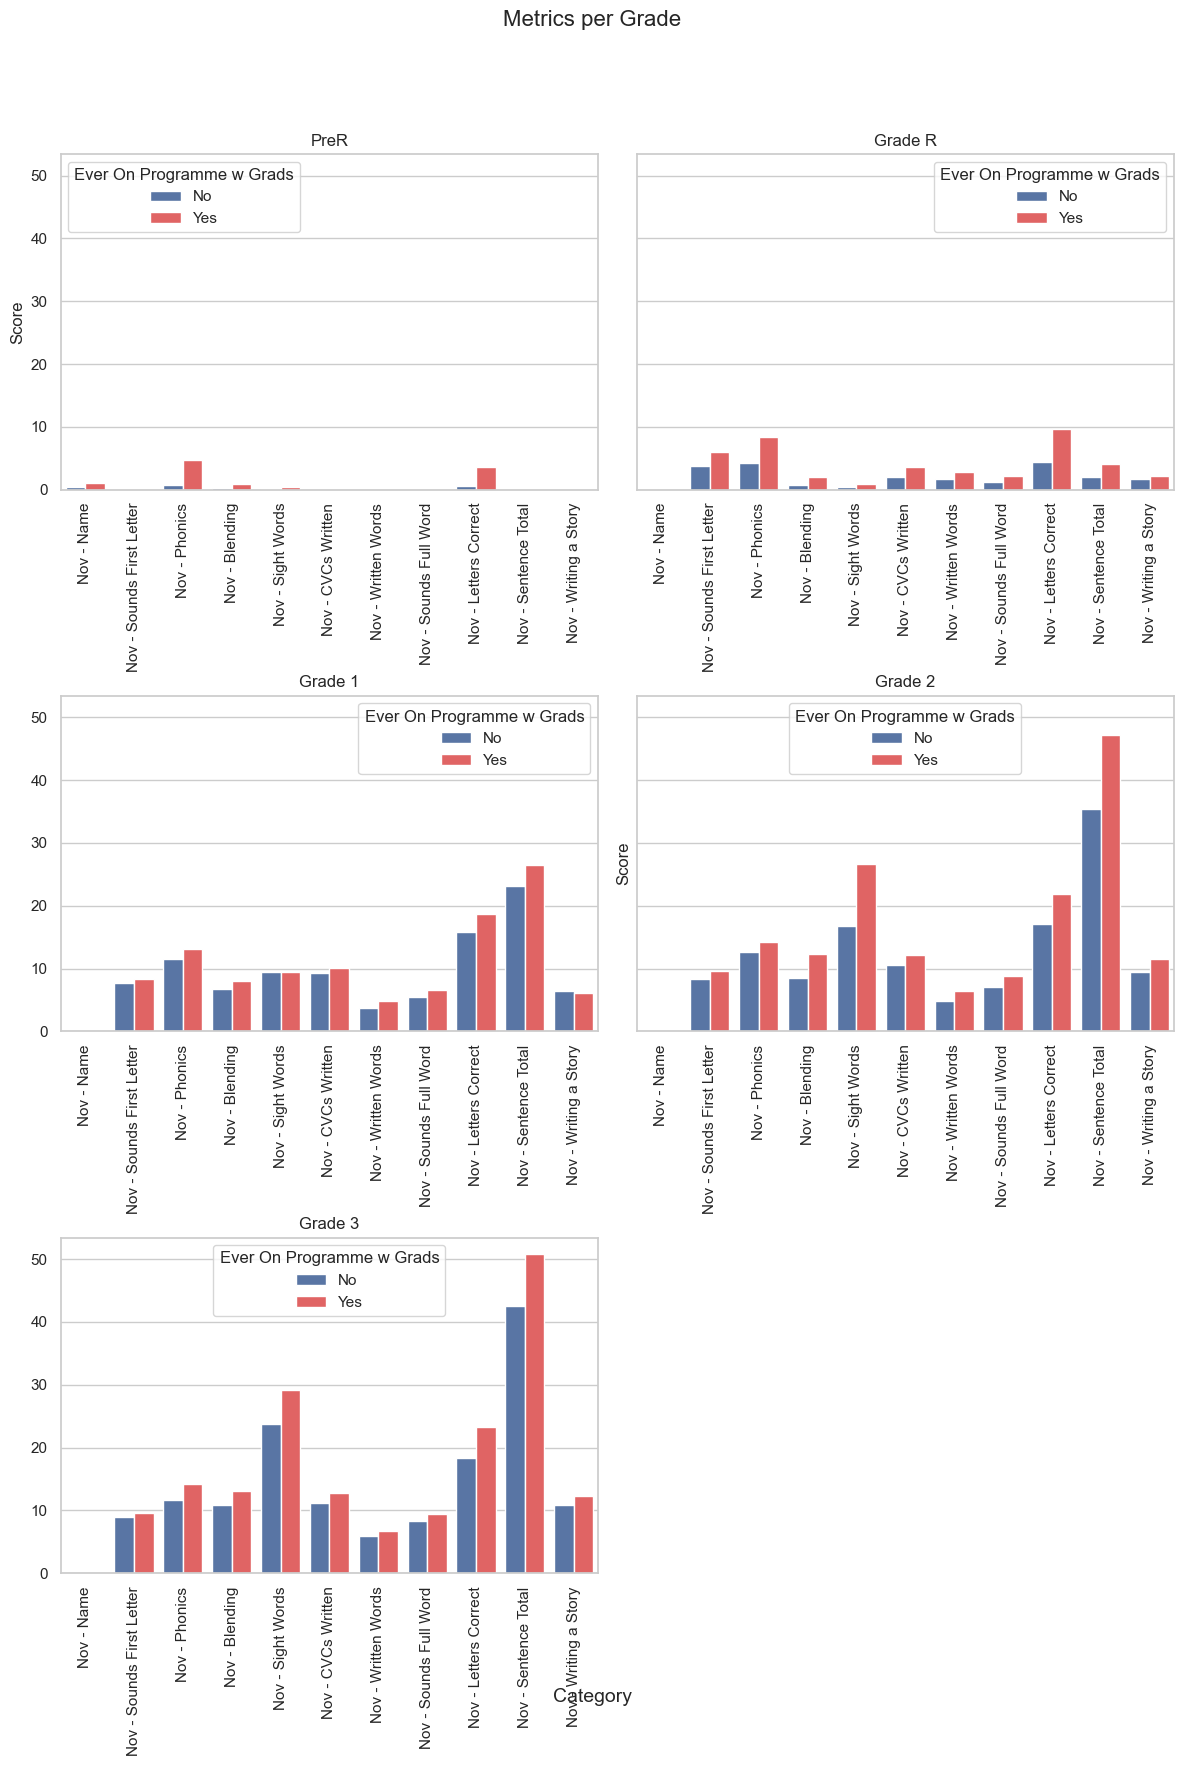

In [137]:
# List of total columns
total_columns = ['Nov - Name', 'Nov - Sounds First Letter',
       'Nov - Phonics', 'Nov - Blending', 'Nov - Sight Words',
       'Nov - CVCs Written', 'Nov - Written Words', 'Nov - Sounds Full Word',
       'Nov - Letters Correct', 'Nov - Sentence Total',
       'Nov - Writing a Story',
]

# Melt the DataFrame into a long format
long_format = children.melt(
    id_vars=["Ever On Programme w Grads", "Grade"],
    value_vars=total_columns,
    var_name="Category",
    value_name="Total Score",
)

grades = ["PreR", "Grade R", "Grade 1", "Grade 2", "Grade 3"]

# Create a subplot grid with 2 rows and 3 columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 18), sharey=True)
fig.suptitle("Metrics per Grade", fontsize=16)

# Flatten the axes array for easier iteration
axes = axes.flatten()


# Define the custom palette
palette = {"Yes": "#F45050", "No": "C0"}

for grade, ax in zip(grades, axes):
    grade_data = long_format[long_format["Grade"] == grade]
    sns.barplot(data=grade_data, x="Category", y="Total Score", hue="Ever On Programme w Grads", hue_order=["No","Yes"], ci=None, ax=ax, palette=palette)
    ax.set_title(grade)
    ax.set_xlabel("")
    ax.set_ylabel("")

# Set y-axis label for the first subplot
axes[0].set_ylabel("Score")
axes[3].set_ylabel("Score")

# Set a common x-axis label for all subplots
fig.text(0.5, 0.04, "Category", ha="center", fontsize=14)

# Rotate x-axis labels for better readability
for ax in axes:
    ax.tick_params(axis="x", rotation=90)

# Remove the last (empty) subplot
axes[-1].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Metrics per Grade

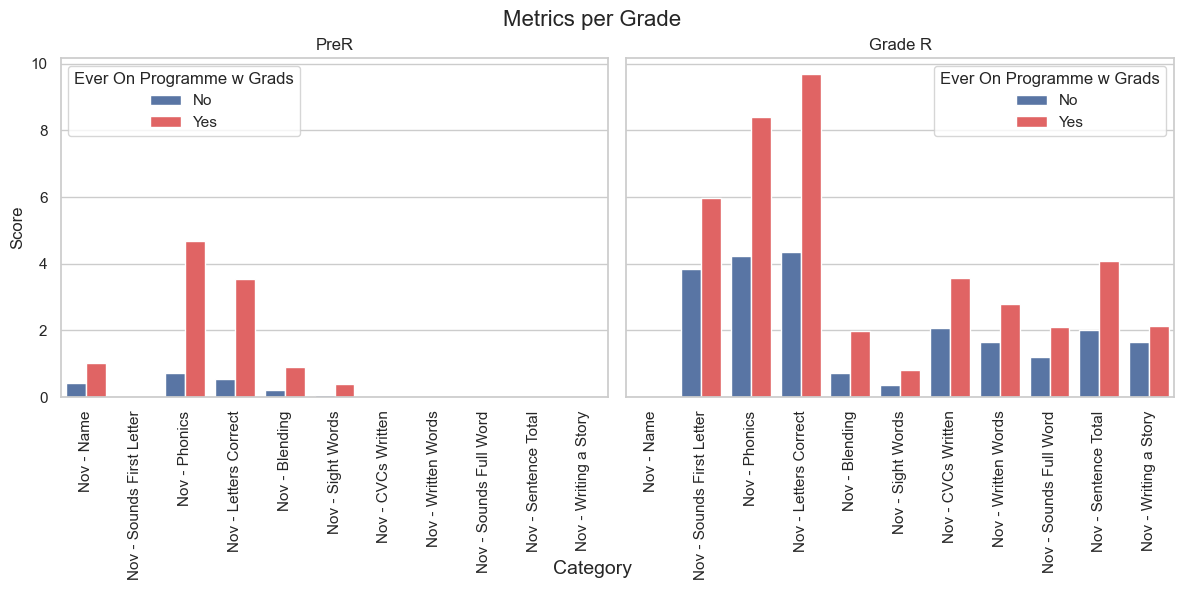

In [138]:
# List of total columns
total_columns = ['Nov - Name', 'Nov - Sounds First Letter',
       'Nov - Phonics', 'Nov - Letters Correct', 'Nov - Blending', 'Nov - Sight Words',
       'Nov - CVCs Written', 'Nov - Written Words', 'Nov - Sounds Full Word',
        'Nov - Sentence Total',
       'Nov - Writing a Story',
]

# Melt the DataFrame into a long format
long_format = children.melt(
    id_vars=["Ever On Programme w Grads", "Grade"],
    value_vars=total_columns,
    var_name="Category",
    value_name="Total Score",
)

grades = ["PreR", "Grade R"]

# Create a subplot grid with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)
fig.suptitle("Metrics per Grade", fontsize=16)

# Define the custom palette
palette = {"Yes": "#F45050", "No": "C0"}

for grade, ax in zip(grades, axes):
    grade_data = long_format[long_format["Grade"] == grade]
    sns.barplot(data=grade_data, x="Category", y="Total Score", hue="Ever On Programme w Grads", hue_order=["No","Yes"], ci=None, ax=ax, palette=palette)
    ax.set_title(grade)
    ax.set_xlabel("")
    ax.set_ylabel("")

# Set y-axis label for the first subplot
axes[0].set_ylabel("Score")

# Set a common x-axis label for all subplots
fig.text(0.5, 0.04, "Category", ha="center", fontsize=14)

# Rotate x-axis labels for better readability
for ax in axes:
    ax.tick_params(axis="x", rotation=(90))

plt.tight_layout()
plt.subplots_adjust(top=0.9)


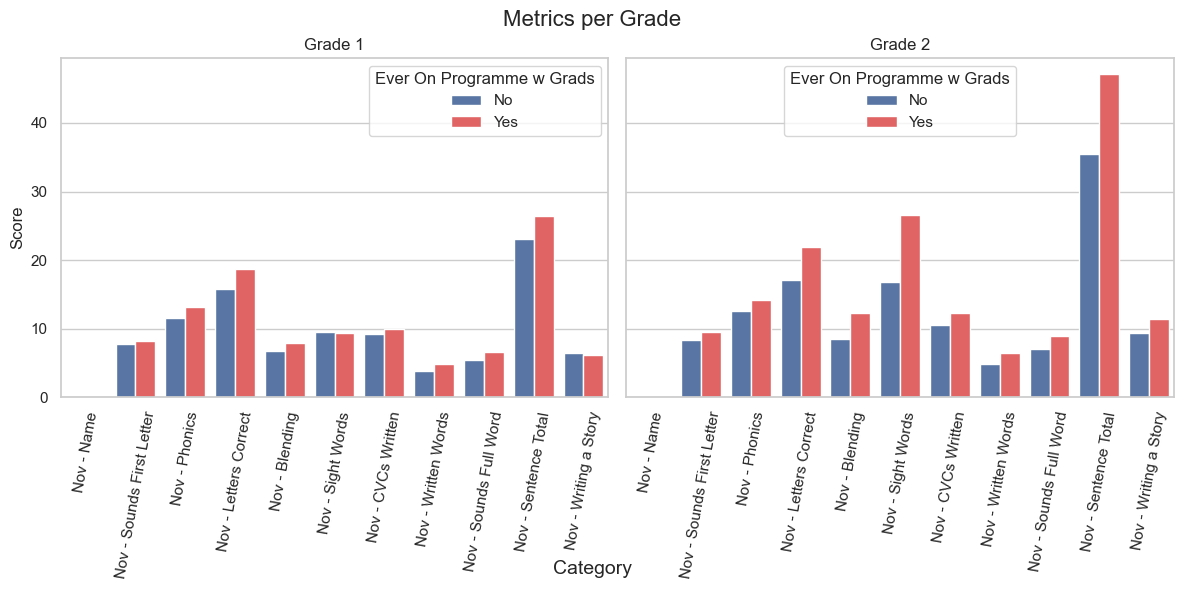

In [139]:
# List of total columns
total_columns = ['Nov - Name', 'Nov - Sounds First Letter',
       'Nov - Phonics', 'Nov - Letters Correct','Nov - Blending', 'Nov - Sight Words',
       'Nov - CVCs Written', 'Nov - Written Words', 'Nov - Sounds Full Word',
        'Nov - Sentence Total',
       'Nov - Writing a Story',
]

# Melt the DataFrame into a long format
long_format = children.melt(
    id_vars=["Ever On Programme w Grads", "Grade"],
    value_vars=total_columns,
    var_name="Category",
    value_name="Total Score",
)

grades = ["Grade 1", "Grade 2"]

# Create a subplot grid with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)
fig.suptitle("Metrics per Grade", fontsize=16)

# Define the custom palette
palette = {"Yes": "#F45050", "No": "C0"}

for grade, ax in zip(grades, axes):
    grade_data = long_format[long_format["Grade"] == grade]
    sns.barplot(data=grade_data, x="Category", y="Total Score", hue="Ever On Programme w Grads", hue_order=["No","Yes"], ci=None, ax=ax, palette=palette)
    ax.set_title(grade)
    ax.set_xlabel("")
    ax.set_ylabel("")

# Set y-axis label for the first subplot
axes[0].set_ylabel("Score")

# Set a common x-axis label for all subplots
fig.text(0.5, 0.04, "Category", ha="center", fontsize=14)

# Rotate x-axis labels for better readability
for ax in axes:
    ax.tick_params(axis="x", rotation=80)

plt.tight_layout()
plt.subplots_adjust(top=0.9)


# Sessions vs Performance

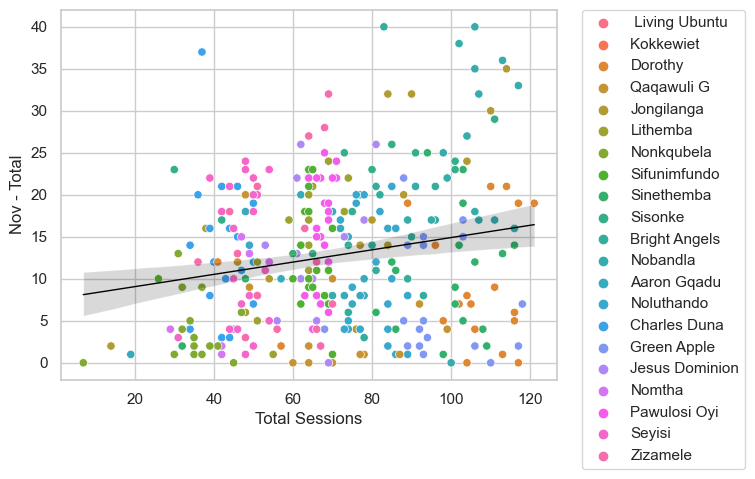

In [140]:
sns.scatterplot(data = on_programme_ecd, x="Total Sessions", y="Nov - Total", hue="Schools")
sns.regplot(data=on_programme_ecd, x="Total Sessions", y="Nov - Total", scatter=False, color='black', line_kws={"linewidth": 1})
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [15]:
fig = px.scatter(on_programme_ecd, x="Total Sessions", y="Nov - Total", color="Schools")
fig.show()

In [24]:
px.scatter(
    all_Primary,
    x="Total Sessions",
    y="Nov - Total",
    color="Grade",
    trendline="ols"

)

In [52]:
px.scatter(
    all_R,
    x="Total Sessions",
    y="Sounds and Phonics Improvement",
    color="full_sessions",
    trendline="ols"

)

In [56]:
px.scatter(
    all_ECD,
    x="Nov - Total",
    y="Nov - Total",
    color="On The Programme",
    trendline="ols"

)

In [27]:
all_ECD['On The Programme'].value_counts()

No      904
Yes     420
Left     29
Name: On The Programme, dtype: int64

### Grade R Phonics: Base Case

This is gives a sense of the starting point of children at the different schools. Note the Y-axis, in reality there's very little difference between the children

<AxesSubplot:title={'center':'Grade 1: Base Case Phonics'}, xlabel='Schools'>

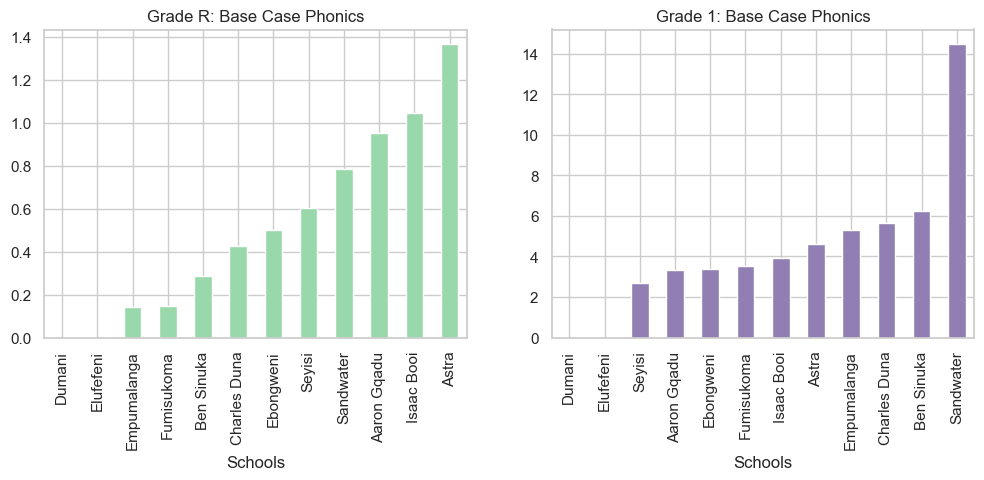

In [142]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title("Grade R: Base Case Phonics")
GradeR = children[children['Grade'] == "Grade R"]
GR = GradeR.groupby("Schools")
GR['Jan - Phonics'].mean().sort_values().plot(kind="bar", color = GR_colour)
plt.subplot(1,2,2)
plt.title("Grade 1: Base Case Phonics")
Grade1 = children[children['Grade'] == "Grade 1"]
G1 = Grade1.groupby("Schools")
G1['Jan - Phonics'].mean().sort_values().plot(kind="bar", color = G1_colour)

## Standard Deviation Checks
#### Comparing Standard Deviations per Site

Higher standard deviations should be investigated as it's an indicator that the LCs are not taking their children correctly. Note that much higher SDs are to be expected in ECDCs b/c of attendance and parents paying fees.

### Primary School Standard Deviation

Text(0.5, 0, '<-----  Good                  Bad  ----->')

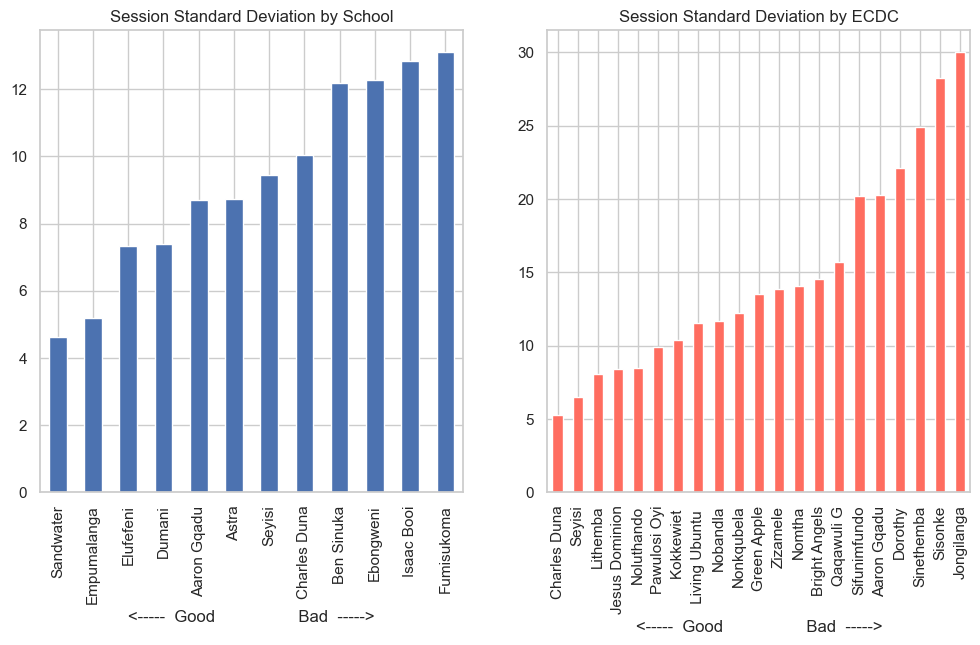

In [143]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
on_primary['Total Sessions'].std().sort_values().plot(kind="bar")
plt.title("Session Standard Deviation by School")
plt.xlabel("<-----  Good                  Bad  ----->")
plt.subplot(1,2,2)
on_ecd['Total Sessions'].std().sort_values().plot(kind="bar", color=ECD_colour)
plt.title("Session Standard Deviation by ECDC")
plt.xlabel("<-----  Good                  Bad  ----->")

In [144]:
all_Primary.groupby("LC Name")['Total Sessions'].std().sort_values(ascending=False).head(10)

LC Name
Khanya Keli              16.941074
Hazel Khumalo            16.463918
Anelisa Fikayo           15.015144
Sinothando Swaartbooi    14.979987
Chuma Bingwa             14.273041
Blessing                 13.968308
Siphosethu Somadlaka     13.808430
Khanyisa Mini            13.106402
Akhona Mandla Bazi       13.021777
Clearize Billet          12.777685
Name: Total Sessions, dtype: float64

In [145]:
all_ECD.groupby("LC Name")['Total Sessions'].std().sort_values(ascending=False).head(10)

LC Name
Pumla         39.764703
Siyakhiwa     32.424271
Nwabisa       31.383688
Thabile       29.646421
Zanele        24.440404
Khanyiswa     23.790379
Asiphe        21.155270
Siphokazi     21.064272
Ntombovuyo    21.047957
Ncebakazi     20.434374
Name: Total Sessions, dtype: float64

## Total Sessions Comparisons

### Primary School Sessions

<AxesSubplot:xlabel='Schools'>

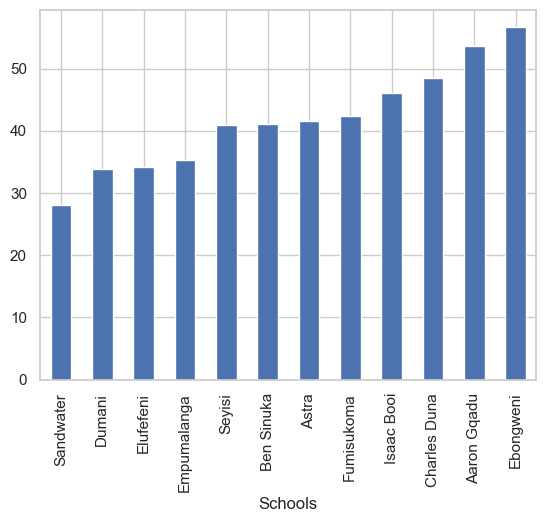

In [146]:
on_primary['Total Sessions'].mean().sort_values().plot(kind="bar", color="b")

### ECDC Sesssions

<AxesSubplot:xlabel='Schools'>

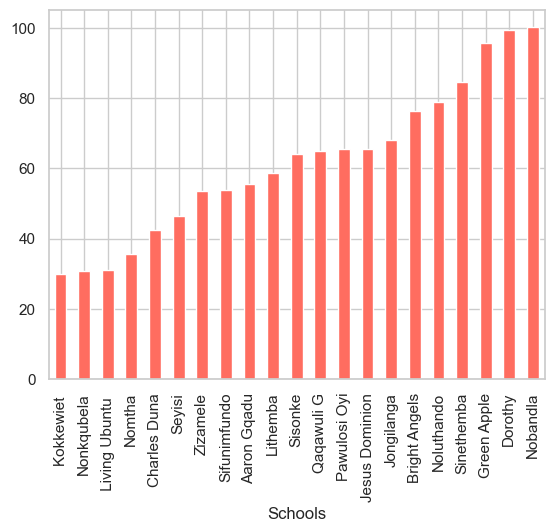

In [147]:
on_ecd['Total Sessions'].mean().sort_values().plot(kind="bar", color=ECD_colour)

# Comparing Results

## Primary Schools (All Learners - End of Year)

<AxesSubplot:title={'center':'All Grade 3s: Total Score'}, xlabel='Schools'>

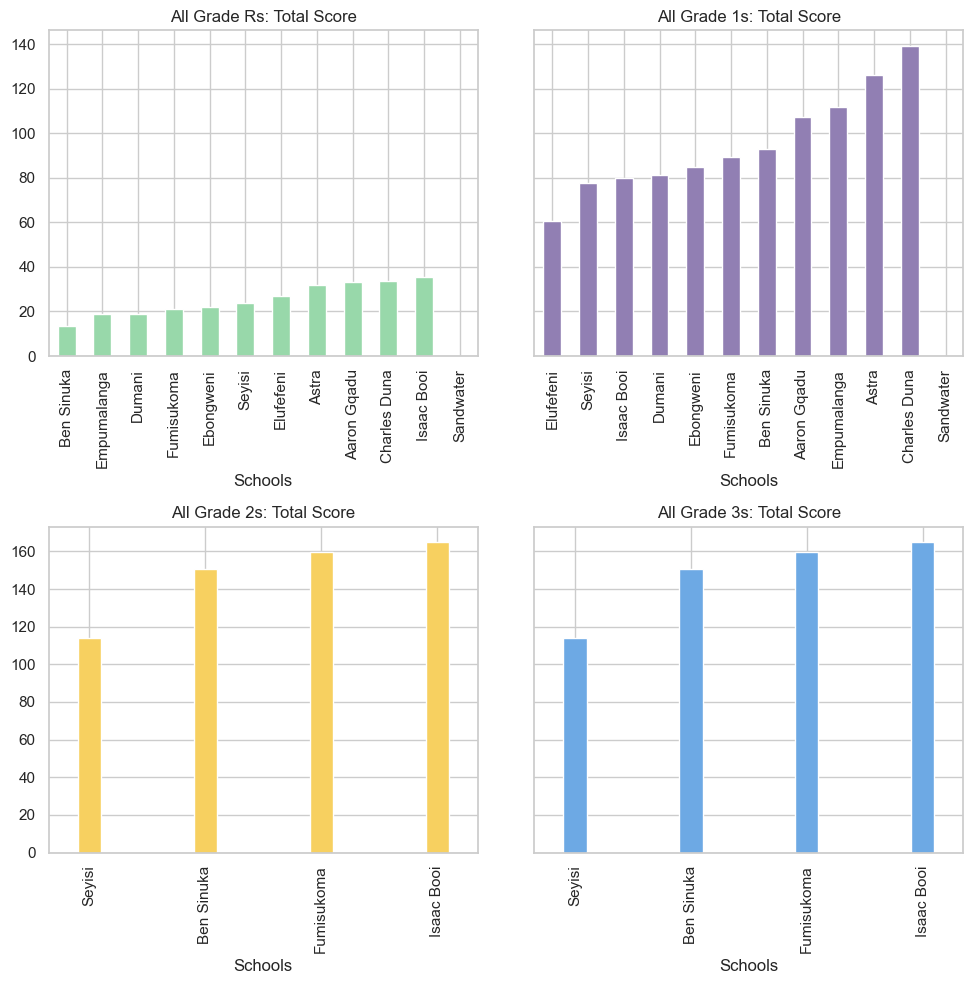

In [148]:
plt.figure(figsize = (10,10))
ax = plt.subplot(2,2,1)
plt.title("All Grade Rs: Total Score")
all_R.groupby("Schools")['Nov - Total'].mean().sort_values().plot(kind="bar", color = GR_colour)
plt.subplot(2,2,2, sharey = ax)
plt.title("All Grade 1s: Total Score")
all_1.groupby("Schools")['Nov - Total'].mean().sort_values().plot(kind="bar", color = G1_colour)
ax2 = plt.subplot(2,2,3)
plt.tight_layout()
plt.title("All Grade 2s: Total Score")
all_2.groupby("Schools")['Nov - Total'].mean().sort_values().plot(kind="bar", width=0.2, color = G2_colour)
plt.subplot(2,2,4, sharey = ax2)
plt.tight_layout()
plt.title("All Grade 3s: Total Score")
all_2.groupby("Schools")['Nov - Total'].mean().sort_values().plot(kind="bar", width=0.2, color = G3_colour)

## ECD & Grade R: Final Score & Improvement

- The first row shows the final scores. This allows us to compare schools / ECD Centres (at least in terms of what the assessment captures).
- The second row shows total improvement in scores. This allows us to view the 

Text(0.5, 1.0, 'Grade R Improvement')

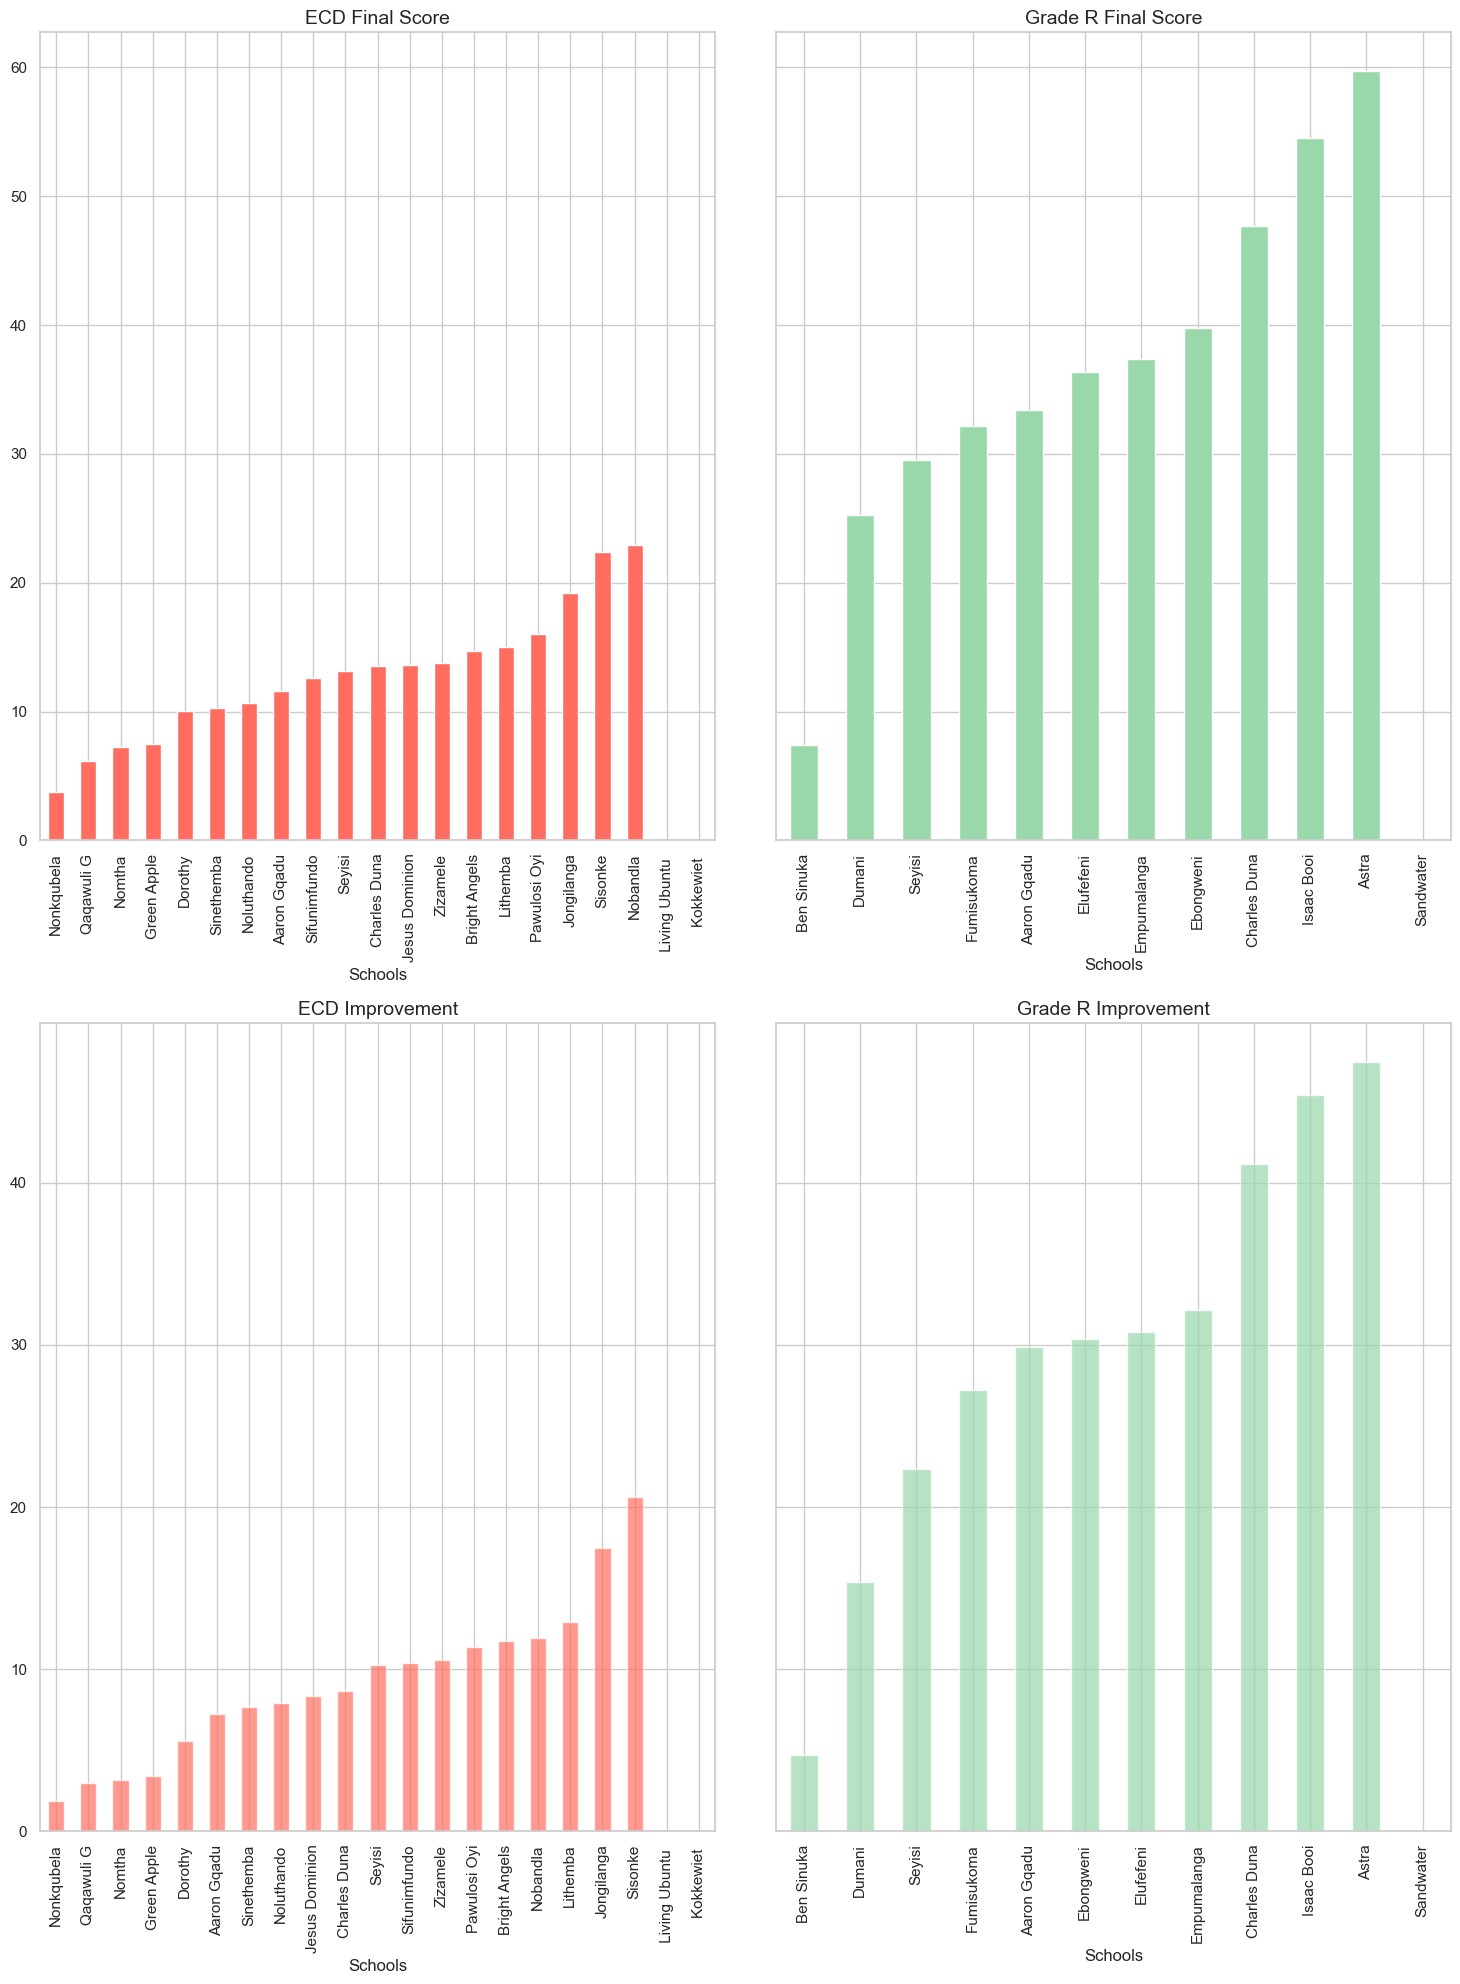

In [149]:
plt.figure(figsize=(15,20))
plt.tight_layout()
ax = plt.subplot(2,2,1)
plt.title("ECD Final Score", fontsize = 14)
on_ecd['Nov - Total'].mean().sort_values().plot(kind="bar", color=ECD_colour)
plt.subplot(2,2,2, sharey = ax)
on_R['Nov - Total'].mean().sort_values().plot(kind="bar", color=GR_colour)
plt.title("Grade R Final Score", fontsize = 14)
ax2 = plt.subplot(2,2,3)
plt.tight_layout()
plt.title("ECD Improvement", fontsize = 14)
on_ecd['Total Improvement'].mean().sort_values().plot(kind="bar", alpha = 0.7, color=ECD_colour)
plt.subplot(2,2,4, sharey = ax2)
plt.tight_layout()
on_R['Total Improvement'].mean().sort_values().plot(kind="bar", alpha = 0.7, color=GR_colour)
plt.title("Grade R Improvement", fontsize = 14)

## ECD & Grade R: Phonics Score & Improvement

Text(0.5, 1.0, 'Grade R Phonics Improvement')

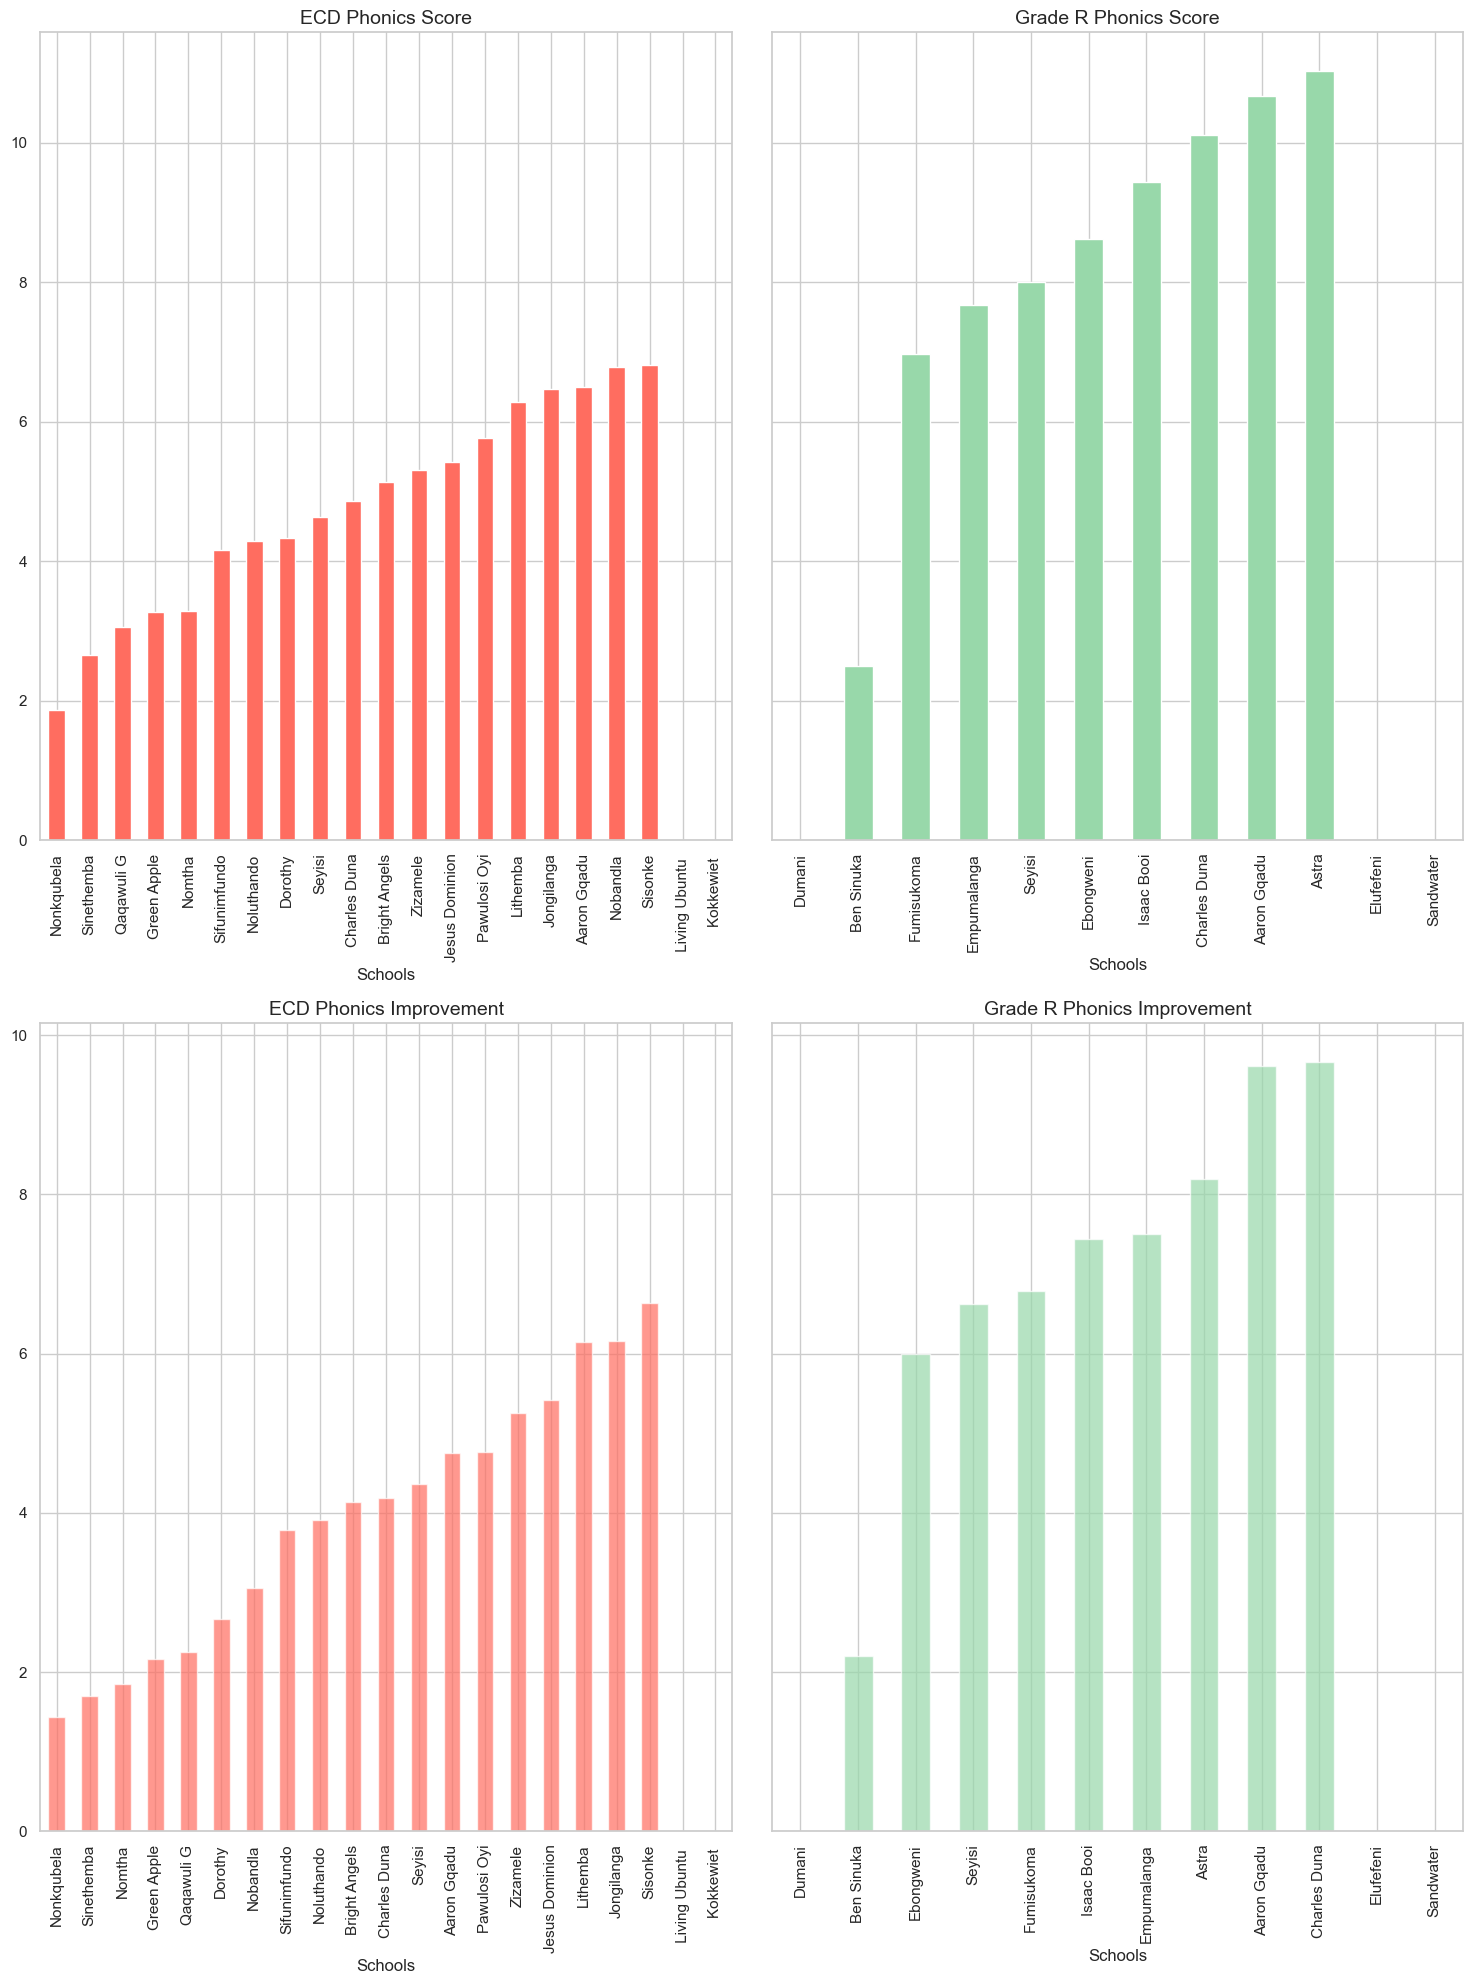

In [150]:
plt.figure(figsize=(15,20))
plt.tight_layout()
ax = plt.subplot(2,2,1)
plt.title("ECD Phonics Score", fontsize = 14)
on_ecd['Nov - Phonics'].mean().sort_values().plot(kind="bar", color=ECD_colour)
plt.subplot(2,2,2, sharey = ax)
on_R['Nov - Phonics'].mean().sort_values().plot(kind="bar", color=GR_colour)
plt.title("Grade R Phonics Score", fontsize = 14)
ax2 = plt.subplot(2,2,3)
plt.tight_layout()
plt.title("ECD Phonics Improvement", fontsize = 14)
on_ecd['Phonics Improvement'].mean().sort_values().plot(kind="bar", alpha = 0.7, color=ECD_colour)
plt.subplot(2,2,4, sharey = ax2)
plt.tight_layout()
on_R['Phonics Improvement'].mean().sort_values().plot(kind="bar", alpha = 0.7, color=GR_colour)
plt.title("Grade R Phonics Improvement", fontsize = 14)

Text(0.5, 1.0, 'Grade 2 Improvement')

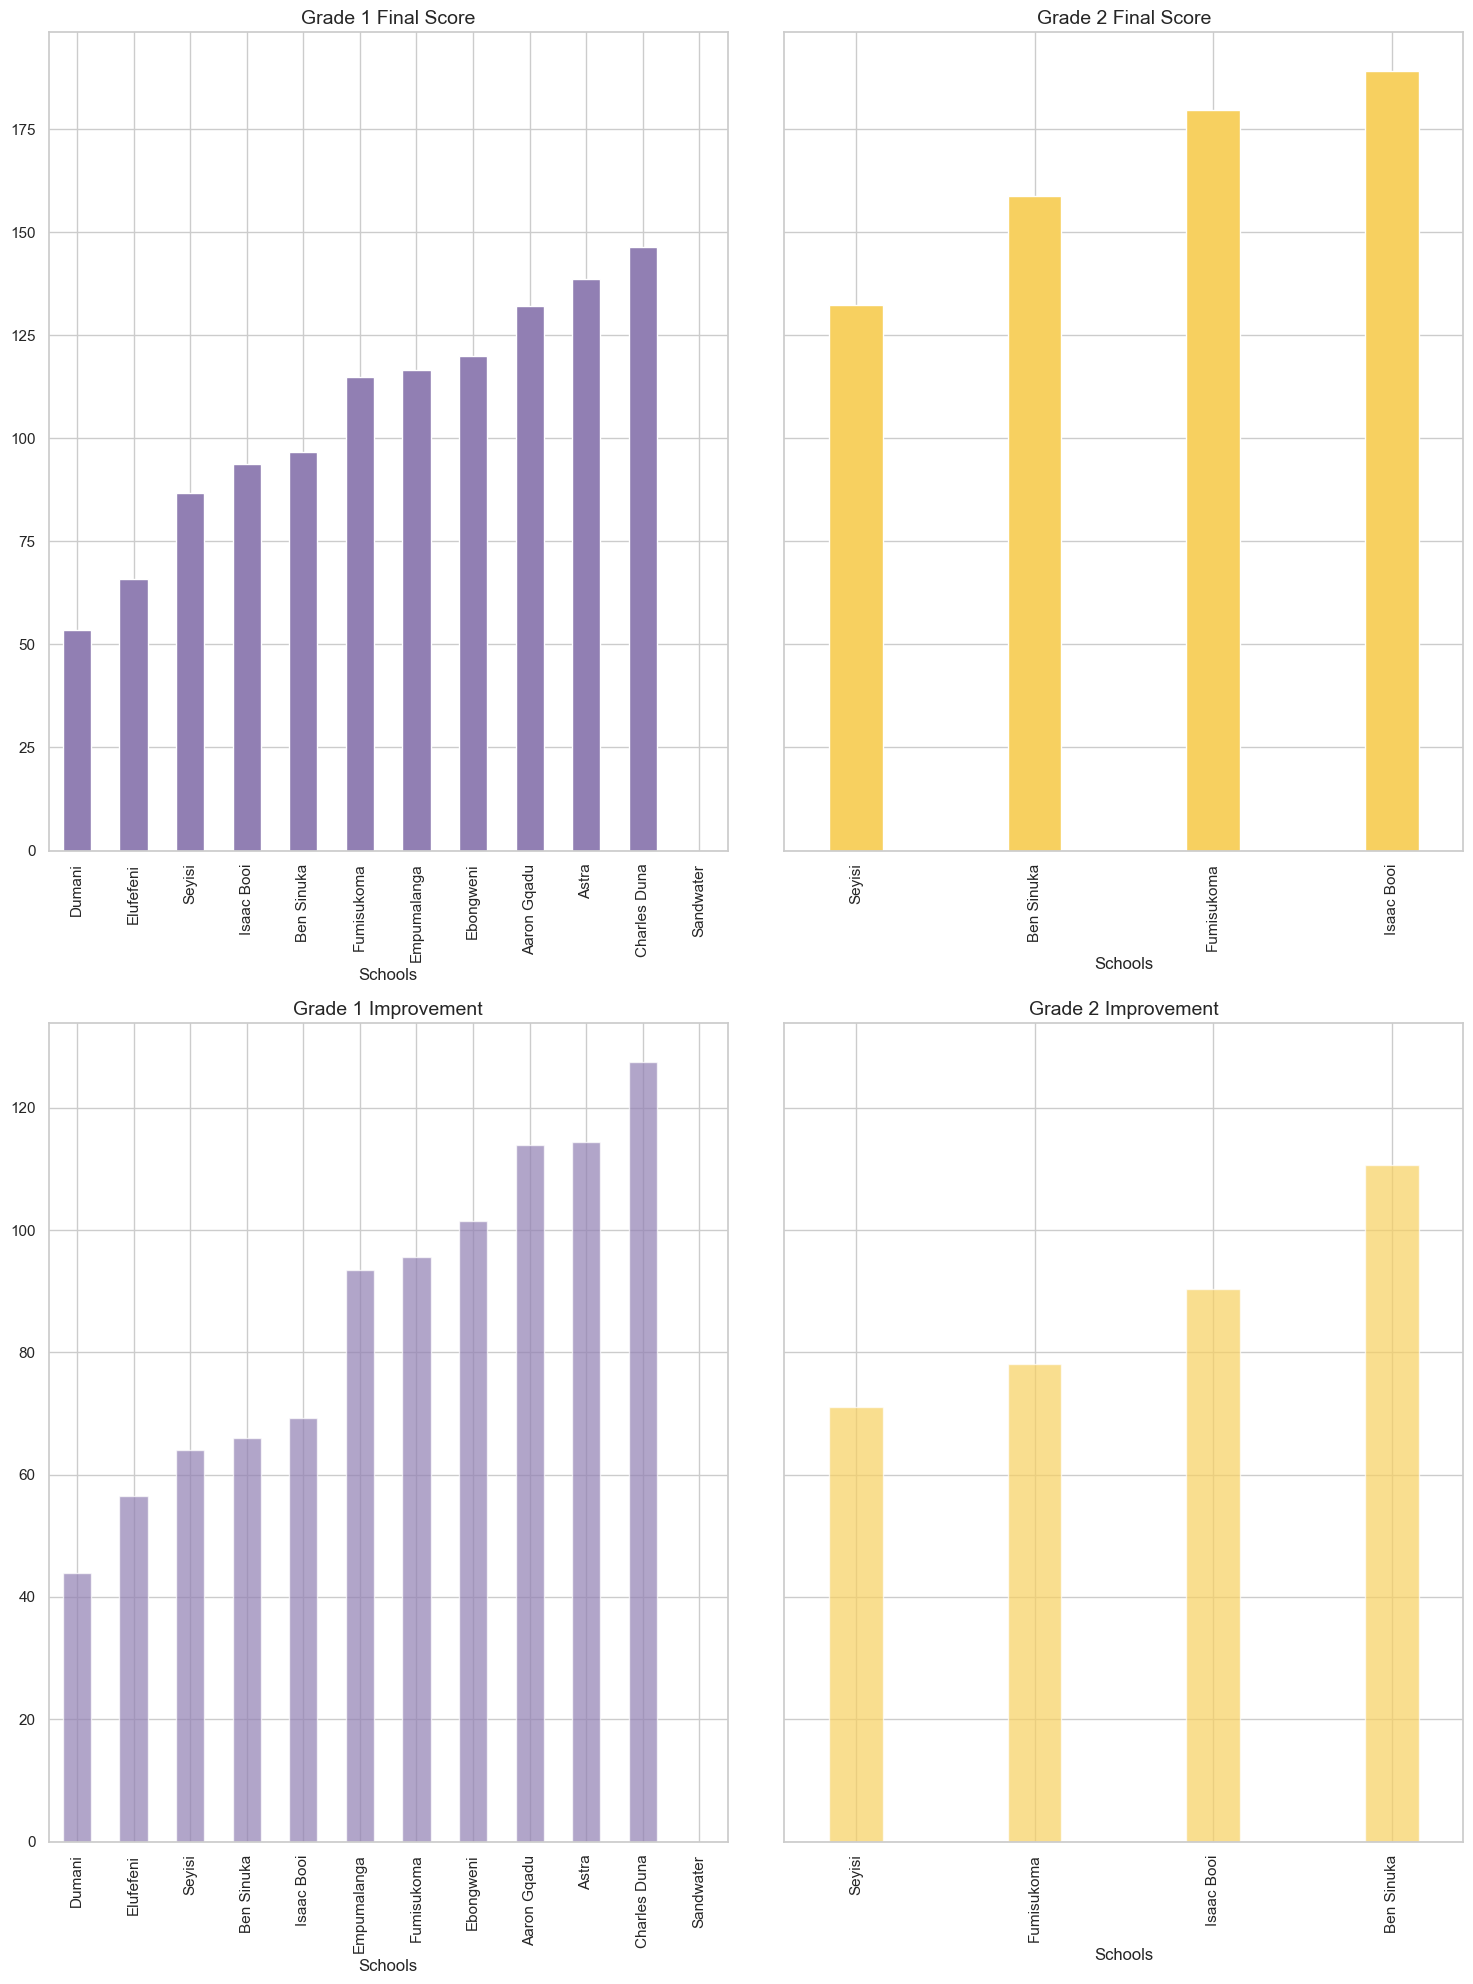

In [151]:
plt.figure(figsize=(15,20))
plt.tight_layout()
ax = plt.subplot(2,2,1)
plt.title("Grade 1 Final Score", fontsize = 14)
on_1['Nov - Total'].mean().sort_values().plot(kind="bar", color=G1_colour)
plt.subplot(2,2,2, sharey = ax)
plt.title("Grade 2 Final Score", fontsize = 14)
on_2['Nov - Total'].mean().sort_values().plot(kind="bar", width=0.3, color=G2_colour)
ax2 = plt.subplot(2,2,3)
plt.tight_layout()
plt.title("Grade 1 Improvement", fontsize = 14)
on_1['Total Improvement'].mean().sort_values().plot(kind="bar", alpha = 0.7, color=G1_colour)
plt.subplot(2,2,4, sharey = ax2)
plt.tight_layout()
on_2['Total Improvement'].mean().sort_values().plot(kind="bar", width = 0.3, alpha = 0.7, color=G2_colour)
plt.title("Grade 2 Improvement", fontsize = 14)

## Grade R & 1 Phonics Improvement

<AxesSubplot:title={'center':'Grade 1 Phonics Improvement'}, xlabel='Schools'>

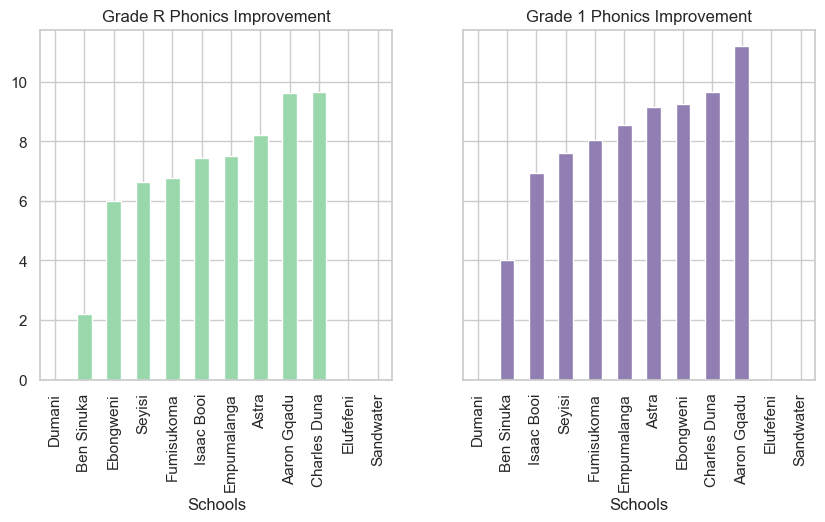

In [152]:
plt.figure(figsize=(10,10))
ax = plt.subplot(2,2,1)
plt.title("Grade R Phonics Improvement")
on_R['Phonics Improvement'].mean().sort_values().plot(kind="bar", color=GR_colour)
plt.subplot(2,2,2, sharey = ax)
plt.title("Grade 1 Phonics Improvement")
on_1['Phonics Improvement'].mean().sort_values().plot(kind="bar", color=G1_colour)

## Grade 2 & 3 Total Improvement

<AxesSubplot:title={'center':'Grade 3 Total Improvement'}, xlabel='Schools'>

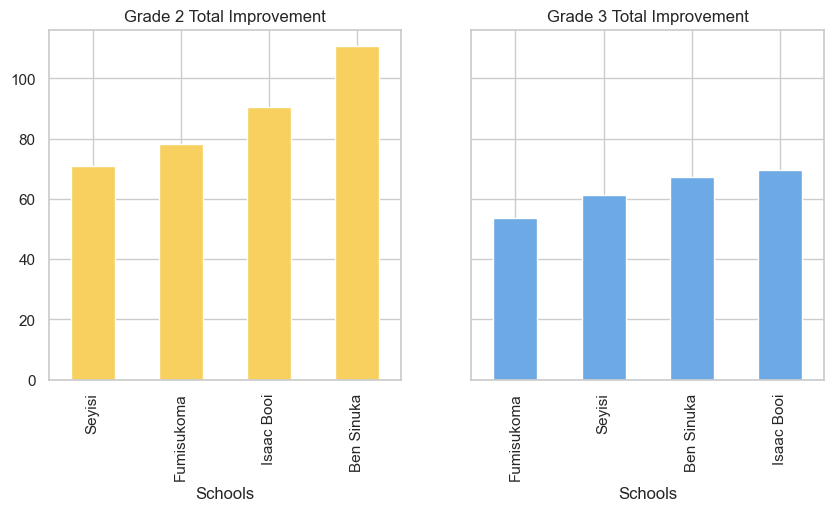

In [153]:
plt.figure(figsize=(10,10))
ax = plt.subplot(2,2,1)
plt.title("Grade 2 Total Improvement")
on_2['Total Improvement'].mean().sort_values().plot(kind="bar", color=G2_colour)
plt.subplot(2,2,2, sharey=ax)
plt.title("Grade 3 Total Improvement")
on_3['Total Improvement'].mean().sort_values().plot(kind="bar", color=G3_colour)

# Underperforming Children
#### The list below is grabbing children with progress < 10 that are in primary school

In [154]:
underperforming_primary = children[(children['Total Improvement'] < 10) & (children['Total Sessions'] > 10) & (children['Nov - Total'] > 0) & (children['Grade'] != "PreR")]
underperforming_list = underperforming_primary[["Schools", "Class", "LC Name", "Surname & Name","Total Sessions", "Nov - Total", "Total Improvement"]]
pd.set_option('display.max_rows', 100)
underperforming_list.sort_values("LC Name")

Schools Class               LC Name               Surname & Name  \
3153    Fumisukoma    RA         Akhona Notoko               Yedwa Iminathi   
3047    Fumisukoma    RA      Anesipho Ndarala            Fisanti Siyabonga   
3089    Fumisukoma    RC      Anesipho Ndarala              Mazungula Iviwe   
632      Elufefeni    1C        Asanda Ntozini                Bukatya Lunje   
2694        Dumani    RD               Asiphe                    Mali Asive   
2748        Dumani    RB               Asiphe                Ndlebe Lulonke   
2767        Dumani    RB               Asiphe                Nyunyu Likhona   
2461         Astra    RA      Ayabonga Mabuza                   Vries Emile   
1910    Fumisukoma    3A              Blessing               Hlohla Mihlali   
3365        Seyisi    RA          Chuma Bingwa                Sityebi Oyama   
1216        Seyisi    1B          Chuma Bingwa                    Bazi Elam   
3108    Fumisukoma    RA           Elam Xalipi           Njamelana Eminathi   
1974    Fumisukoma    3A             Graduated             Mgidi Khetokuhle   
2402         Astra    RA         Kaylin Goede                Ismail Shaheed   
232     Ben Sinuka    1A          Khanya Keli   Tshayisa Alahlulwa Alunamda   
218     Ben Sinuka    1A          Khanya Keli               Matini Ibanathi   
2132     Ebongweni    RA                  Left                January Qhawe   
1965     Elufefeni    1A                  Left         Mtalana Buhle Junior   
2206     Elufefeni    RB                  Left              Vela Siphosethu   
2854     Ebongweni     R         Likhona Simba             Gudwana Anesipho   
576      Ebongweni    RA         Likhona Simba               Nolatshu Kamva   
697      Elufefeni    1B      Liyakhanya Dwane               Mpofana Mivuyo   
2932     Elufefeni    RB             Luhle Ben                Wana Azenathi   
2478    Ben Sinuka    RA       Luphumzo Bassie                 Ndzoyi Buhle   
2481    Ben Sinuka    RA       Luphumzo Bassie                 Patwa Aqhama   
2471    Ben Sinuka    RA       Luphumzo Bassie            Khohliwe Endinako   
2957    Ben Sinuka    RA       Luphumzo Bassie                 Mamase Aluve   
206     Ben Sinuka    1A       Luphumzo Bassie             Figlan Singoziwe   
1274        Seyisi    1B        Luthando Heshu               Mgxeshe Namhla   
1223        Seyisi    1C        Luthando Heshu                  Bulo Ntsika   
2657        Dumani    RC                 Mbasa              Jack Linamandla   
2614        Dumani    RA                 Mbasa                 Bobani Unako   
2685   Empumalanga    RA                  Nada             Gundwana Sonwabi   
3036    Fumisukoma    RA        Nasiphi Mramba               April Akhanani   
1025    Fumisukoma    1B         Ncumisa Mjoli           Ngindo Siyamthanda   
2994   Empumalanga    RC            Noluthando               Mbozi Iminathi   
3309        Seyisi    RB  Nomathamsanqa Mazoka               Hewu Aphindiwe   
2078    Isaac Booi    3B    Nontyatyambo Lutya             Bikisha Liyabona   
2355   Aaron Gqadu    RA    Nqophisa Mkhaliphi                Yoyo Athandwa   
3054    Fumisukoma    RA         Ntombizandile                Gwaxa Kungawo   
3037    Fumisukoma    RA         Ntombizandile               Badela Khayone   
1080    Fumisukoma    1D         Ntombizandile               Willem Lunathi   
2524  Charles Duna    RC  Ntomboxolo Makhupula                  Koba Luxolo   
2516  Charles Duna    RA  Ntomboxolo Makhupula              Kakulu Alulupho   
1373    Ben Sinuka    2A       Ntsika Mazondwa                Xhosa Luphawu   
1731        Seyisi    2B       Okuhle Skenjana           Madolwana Iminathi   
3296        Seyisi    RB       Phelisa Mangesi               Bavume Kungawo   
1326        Seyisi    1A       Phelisa Mangesi                Soya Kwakuhle   
3345        Seyisi    RA       Phelisa Mangesi              Mpathi Lingomso   
2742        Dumani    RD         Sino Mozamana               

### LCs with multiple children that are underperforming.

In [155]:
underperforming_list[['LC Name', 'Schools']].value_counts().head(20)

LC Name               Schools     
Luphumzo Bassie       Ben Sinuka      5
Zozo Kota             Ben Sinuka      4
Vuyokazi Mali         Fumisukoma      4
Phelisa Mangesi       Seyisi          3
Asiphe                Dumani          3
Ntombizandile         Fumisukoma      3
Siphosethu            Dumani          2
Ntomboxolo Makhupula  Charles Duna    2
Siphosethu Booi       Isaac Booi      2
Anesipho Ndarala      Fumisukoma      2
Siphosethu Ntungo     Aaron Gqadu     2
Sisipho Ntisa         Fumisukoma      2
Mbasa                 Dumani          2
Luthando Heshu        Seyisi          2
Thabo Menze           Fumisukoma      2
Likhona Simba         Ebongweni       2
Left                  Elufefeni       2
Khanya Keli           Ben Sinuka      2
Chuma Bingwa          Seyisi          2
Zanele                Dumani          2
dtype: int64

### Schools with the most underperforming children

In [156]:
underperforming_list['Schools'].value_counts().sort_values(ascending=False)

Fumisukoma      19
Dumani          14
Seyisi          13
Ben Sinuka      12
Elufefeni        5
Aaron Gqadu      4
Astra            3
Ebongweni        3
Isaac Booi       3
Charles Duna     3
Empumalanga      2
Name: Schools, dtype: int64

## Most Improved Children on Programme

In [157]:
on_programme_primary[['Mcode', 'Schools','Grade','Surname & Name','Ever On Programme','Jan - Total', 'Nov - Total','Total Improvement']].sort_values(by='Total Improvement',ascending=False).head(20)

Mcode       Schools    Grade            Surname & Name  \
277    4060  Charles Duna  Grade 1          Kondile Sibusiso   
282    4008  Charles Duna  Grade 1           Lupuwana Andelo   
1053   1908    Fumisukoma  Grade 1         Sijemlana Khayone   
162    1751         Astra  Grade 1        Prinsloo Hardriano   
102    1748         Astra  Grade 1           Jackson Elkezia   
1342   1184    Ben Sinuka  Grade 2               Ganto Entle   
975    1852    Fumisukoma  Grade 1           Maretse Luphelo   
254    4025  Charles Duna  Grade 1          Duma Liyathandwa   
42     1694   Aaron Gqadu  Grade 1        Swaartbooi Kholosa   
1486   1293    Fumisukoma  Grade 2           Mpofana Limyoli   
747    5422   Empumalanga  Grade 1              Adiwale Gift   
1365   1171    Ben Sinuka  Grade 2           Qhutywa Yandisa   
880    5428   Empumalanga  Grade 1              Skhuzo Oyena   
120    1740         Astra  Grade 1           Killian Marclyn   
104    1711         Astra  Grade 1              Jacobs Tylor   
3283   5989    Isaac Booi  Grade R            Tays Oyintando   
319    4076  Charles Duna  Grade 1       Msongelwa Athenkosi   
1728   1628        Seyisi  Grade 2  Lindani Amzolele Likanye   
195    1715         Astra  Grade 1           Vickery Crystal   
1655   1440    Isaac Booi  Grade 2          Mqulwana Bophelo   

     Ever On Programme  Jan - Total  Nov - Total  Total Improvement  
277                Yes         13.0        215.0              202.0  
282                Yes         10.0        208.0              198.0  
1053               Yes         19.0        217.0              198.0  
162                Yes         17.0        211.0              194.0  
102                Yes         17.0        207.0              190.0  
1342               Yes          8.0        197.0              189.0  
975                Yes         14.0        203.0              189.0  
254                Yes          5.0        193.0              188.0  
42                 Yes         12.0        200.0              188.0  
1486               Yes         23.0        207.0              184.0  
747                Yes         25.0        208.0              183.0  
1365               Yes         26.0        209.0              183.0  
880                Yes         33.0        216.0              183.0  
120                Yes         26.0        209.0              183.0  
104                Yes         16.0        197.0              181.0  
3283               Yes          9.0        189.0              180.0  
319                Yes         42.0        219.0              177.0  
1728               Yes         25.0        202.0              177.0  
195                Yes         19.0        196.0              177.0  
1655               Yes         33.0        208.0              175.0

## Results per Big 4 Per Grade

In [158]:
all_four = ["Ben Sinuka", "Seyisi", "Fumisukoma", "Isaac Booi"]
df_all_four = children[(children['Schools'].isin(all_four)) & (children['Ever On Programme'] != "Graduated")]
df_all_four.groupby(["Schools", "Grade", "On The Programme EOY"])[improvement_columns].mean().unstack()

First Sounds Improvement           Phonics Improvement  \
On The Programme EOY                       No       Yes                  No   
Schools    Grade                                                              
Ben Sinuka Grade 1                   3.500000  2.368421            6.333333   
           Grade 2                   2.000000  1.709677            0.250000   
           Grade 3                   3.000000  2.200000            1.903226   
           Grade R                   5.333333  0.900000            4.500000   
Fumisukoma Grade 1                   4.275862  4.352941            7.706897   
           Grade 2                   1.243478  1.515625            2.269565   
           Grade 3                   0.422222  0.842105           -0.918519   
           Grade R                   2.208333  4.571429            1.687500   
Isaac Booi Grade 1                   3.609375  3.837209            6.031250   
           Grade 2                   0.857143  1.666667           -0.428571   
           Grade 3                   1.777778  0.593750            0.269841   
           Grade R                   2.689655  4.875000            4.172414   
Seyisi     Grade 1                   4.272727  2.400000            9.439394   
           Grade 2                   1.268293  1.567568            2.707317   
           Grade 3                   1.642857  1.107143            1.035714   
           Grade R                   4.157895  2.875000            5.026316   
           PreR                           NaN       NaN                 NaN   

                               Sight Words Improvement             \
On The Programme EOY       Yes                      No        Yes   
Schools    Grade                                                    
Ben Sinuka Grade 1    4.000000                3.333333  10.894737   
           Grade 2    5.451613                2.750000  24.709677   
           Grade 3    2.133333                2.935484  13.000000   
           Grade R    2.200000                     NaN        NaN   
Fumisukoma Grade 1    8.058824                5.586207  10.529412   
           Grade 2    1.312500               15.286957  23.078125   
           Grade 3    0.526316                9.214815  10.631579   
           Grade R    6.785714                     NaN        NaN   
Isaac Booi Grade 1    6.930233                2.796875   4.744186   
           Grade 2    2.490196                9.214286  25.019608   
           Grade 3    2.531250                8.174603  22.937500   
           Grade R    7.437500                     NaN        NaN   
Seyisi     Grade 1    7.625000                6.151515   6.325000   
           Grade 2    2.756757                5.365854  11.837838   
           Grade 3    0.392857                8.089286  19.357143   
           Grade R    6.625000                     NaN        NaN   
           PreR       4.363636                     NaN   0.181818   

                     Letters Improvement            Sentence Improvement  \
On The Programme EOY                  No        Yes                   No   
Schools    Grade                                                           
Ben Sinuka Grade 1              8.666667   7.263158                  NaN   
           Grade 2             -4.250000  10.451613             9.000000   
           Grade 3             -0.774194   0.133333             9.451613   
           Grade R              2.000000   0.700000                  NaN   
Fumisukoma Grade 1              9.017241  15.392157                  NaN   
           Grade 2              4.826087   2.625000            28.782609   
           Grade 3             -1.044444  -3.368421            14.607407   
           Grade R              0.541667   5.553571                  NaN   
Isaac Booi Grade 1              9.500000  13.186047                  NaN   
           Grade 2              8.166667   8.235294            21.952381   
           Grade 3              2.825397   4.593750            12.38095

### Charting Total Scores per Grade

<AxesSubplot:xlabel='Schools'>

<Figure size 5000x5000 with 0 Axes>

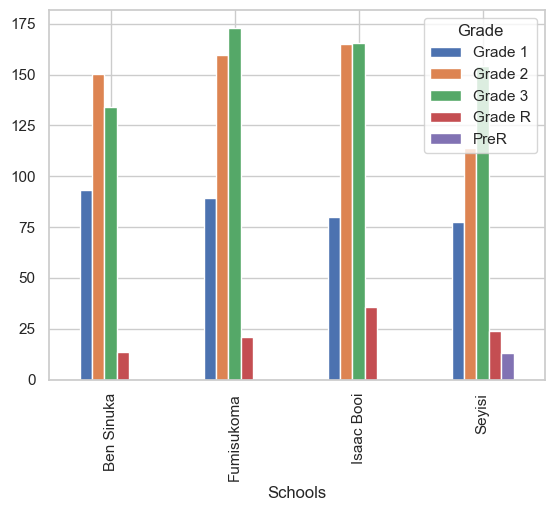

In [159]:
plt.figure(figsize=(50,50))
all_four = ["Ben Sinuka", "Seyisi", "Fumisukoma", "Isaac Booi"]
df_all_four = children[children['Schools'].isin(all_four)]
df_all_four.groupby(["Schools", "Grade"])["Nov - Total"].mean().unstack().plot(kind="bar")

# GPT Prompts

In [48]:
avg_scores = children.groupby('Schools')[['Jan - Phonics', 'Nov - Phonics']].mean().reset_index()
sns.set_theme()
sns.set(style="whitegrid")

In [49]:
num_schools = len(avg_scores['Schools'])
num_schools

30

Text(0.5, 0, 'School')

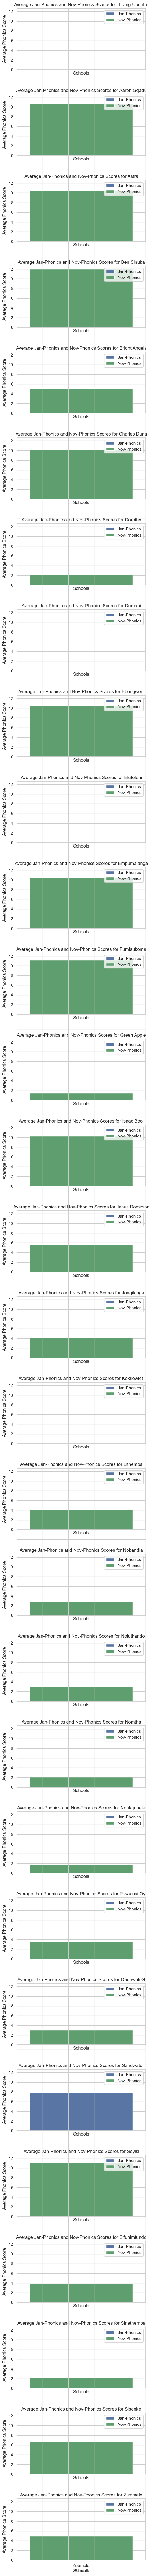

In [50]:
# Calculate the number of schools
num_schools = len(avg_scores['Schools'])

# Create the subplots
fig, axes = plt.subplots(nrows=num_schools, ncols=1, figsize=(6, 4 * num_schools), sharex=True, sharey=True)

# Iterate through the schools and create a bar chart for each
for i, school in enumerate(avg_scores['Schools']):
    ax = axes[i]
    school_data = avg_scores[avg_scores['Schools'] == school]
    
    sns.barplot(data=school_data, x='Schools', y='Jan - Phonics', color='b', label='Jan-Phonics', ax=ax)
    sns.barplot(data=school_data, x='Schools', y='Nov - Phonics', color='g', label='Nov-Phonics', ax=ax)

    # Customize the chart
    ax.set_ylabel("Average Phonics Score")
    ax.set_title(f"Average Jan-Phonics and Nov-Phonics Scores for {school}")
    ax.legend()

# Adjust spacing between subplots and set a common x-axis label
fig.subplots_adjust(hspace=0.4)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("School")

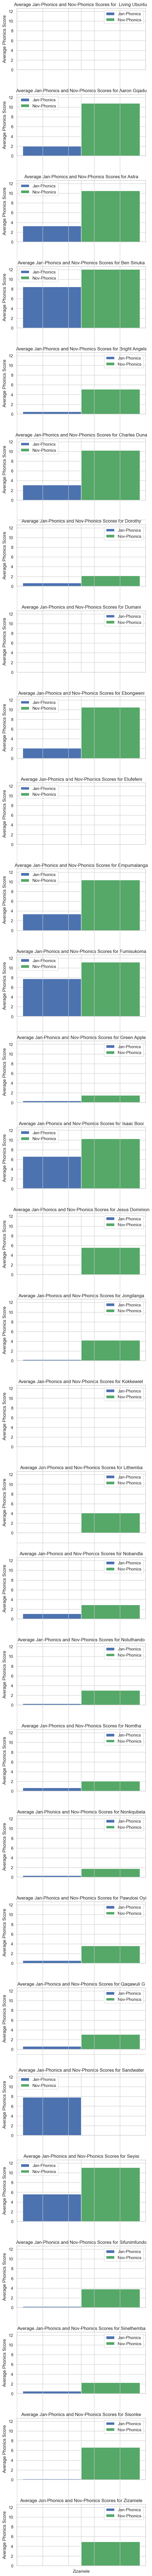

In [51]:
import numpy as np

sns.set(style="whitegrid")

# Calculate the number of schools
num_schools = len(avg_scores['Schools'])

# Create the subplots
fig, axes = plt.subplots(nrows=num_schools, ncols=1, figsize=(6, 4 * num_schools), sharex=True, sharey=True)

# Define bar width
bar_width = 0.35

# Iterate through the schools and create a bar chart for each
for i, school in enumerate(avg_scores['Schools']):
    ax = axes[i]
    school_data = avg_scores[avg_scores['Schools'] == school]

    # Create a bar chart with bars side by side
    jan_scores = school_data['Jan - Phonics']
    nov_scores = school_data['Nov - Phonics']

    index = np.arange(len(school_data))
    
    ax.bar(index, jan_scores, bar_width, label='Jan-Phonics', color='b')
    ax.bar(index + bar_width, nov_scores, bar_width, label='Nov-Phonics', color='g')

    # Customize the chart
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(school_data['Schools'])
    ax.set_ylabel("Average Phonics Score")
    ax.set_title(f"Average Jan-Phonics and Nov-Phonics Scores for {school}")
    ax.legend()

# Adjust spacing between subplots and set a common x-axis label
fig.subplots_adjust(hspace=0.4)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

# Define bar width
bar_width = 0.35

# Create a PDF file to save the charts
with PdfPages("phonics_scores_by_school.pdf") as pdf:
    # Iterate through the schools and create a bar chart for each
    for i, school in enumerate(avg_scores['Schools']):
        # Create the subplots
        fig, ax = plt.subplots(figsize=(6, 4), sharex=True, sharey=True)

        school_data = avg_scores[avg_scores['Schools'] == school]

        # Create a bar chart with bars side by side
        jan_scores = school_data['Jan - Phonics']
        nov_scores = school_data['Nov - Phonics']

        index = np.arange(len(school_data))
        
        ax.bar(index, jan_scores, bar_width, label='Jan-Phonics', color='b')
        ax.bar(index + bar_width, nov_scores, bar_width, label='Nov-Phonics', color='g')

        # Customize the chart
        ax.set_xticks(index + bar_width / 2)
        ax.set_xticklabels(school_data['Schools'])
        ax.set_ylabel("Average Phonics Score")
        ax.set_title(f"Average Jan-Phonics and Nov-Phonics Scores for {school}")
        ax.legend()

        # Save the chart to the PDF
        pdf.savefig(fig)
        plt.close(fig)

print("The PDF file has been created.")


The PDF file has been created.


#### Group By Practice
- Creating a group_by object by school
- isolating Seyisi using get_group
- isolating Seyisi Grade 1 using filtering
- getting some basic stats on Seyisi Grade 1 using describe

In [ ]:
sites = children.groupby("Schools")
seyisi = sites.get_group("Seyisi")
seyisi_g1 = seyisi[seyisi["Grade"] == "Grade 1"]
seyisi_g1.describe()

## Group Bys - Multi Columns

In [ ]:
on_primary_by_grade = on_programme_primary.groupby(["Schools","Grade"])
on_primary_by_grade['Nov - Phonics'].mean()

# List of ideas / double-checks

## Ideas
- hierarchy of schools & then grades for stats
- Run session standard deviations per LC & per grade. Isolate worst offenders to follow up on.
- Compare performance metrics per LC. Not just phonics, but also things like sight words as this will let us see who's (potentially) not doing sight word practice.
- A scatter plot comparing number of sessions with improvement.


## Double-Checks / Fixes
- Children 'On The Programme' w/ an 'LC' but zero sessions
- The 'On The Programme' flag for children that left in the middle of the year (this throws off stats like Sessions STD)
- Set improvements to zero if we didn't do end of year assessments (eg Sandwater)

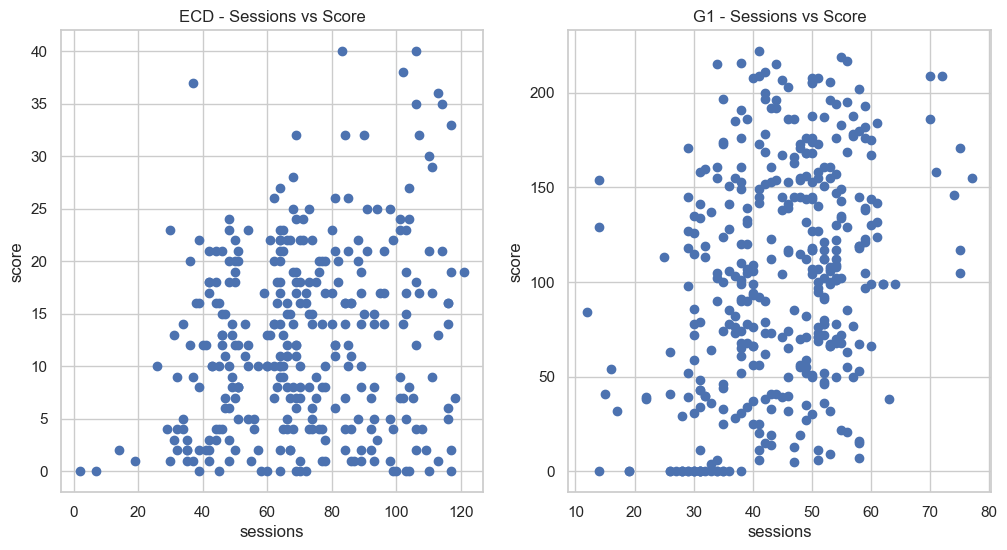

In [450]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.ylabel("score")
plt.xlabel("sessions")
plt.title("ECD - Sessions vs Score")
sessions = on_programme_ecd['Total Sessions']
score = on_programme_ecd['Nov - Total']
plt.scatter(sessions, score)
plt.subplot(1,2,2)
plt.title("G1 - Sessions vs Score")
plt.ylabel("score")
plt.xlabel("sessions")
sessions = on_programme_1['Total Sessions']
score = on_programme_1['Nov - Total']
plt.scatter(sessions, score)

In [482]:
df_jan = children[['Mcode', 'Schools', 'Centre Type', 'Class', 'Teacher', 'Grade', 'Hub',
       'Surname & Name', 'True Zero Check', 'Ever On Programme',
       'On The Programme', 'On The Programme EOY', 'Pairing Number', 'LC Name',
       'Start Date', 'Total Sessions', 'Jan - Pencil handling',
       'Jan - Picture', 'Jan - Name', 'Jan - Sounds First Letter',
       'Jan - Phonics', 'Jan - Blending', 'Jan - Sight Words',
       'Jan - CVCs Written', 'Jan - Written Words', 'Jan - Sounds Full Word',
       'Jan - Letters Correct', 'Jan - Sentence 1', 'Jan - Sentence 2',
       'Jan - Writing a Story', 'Jan - Total', 'Jan - Total Score %']]

In [510]:
df_jan["Total"] = df_jan["Jan = Total"]

KeyError: 'Jan = Total'

In [489]:
df_june = children[['Mcode', 'Schools', 'Centre Type', 'Class', 'Teacher', 'Grade', 'Hub',
       'Surname & Name', 'True Zero Check', 'Ever On Programme',
       'On The Programme', 'On The Programme EOY', 'Pairing Number', 'LC Name',
       'Start Date', 'Total Sessions', 'Jun - Pencil handling',
       'Jun - Picture', 'Jun - Name', 'Jun - Sounds First Letter',
       'Jun - Phonics', 'Jun - Blending', 'Jun - Sight Words',
       'Jun - CVCs Written', 'Jun - Written Words', 'Jun - Sounds Full Word',
       'Jun -  Letters Correct (8/29pts)', 'Jun - Sentence 1', 'Jun - Sentence 2',
       'Jun - Writing a Story', 'Jun - Total', 'Jun - Total Score %']]

In [502]:
df_nov = children[['Mcode', 'Schools', 'Centre Type', 'Class', 'Teacher', 'Grade', 'Hub',
       'Surname & Name', 'True Zero Check', 'Ever On Programme',
       'On The Programme', 'On The Programme EOY', 'Pairing Number', 'LC Name',
       'Start Date', 'Total Sessions', 'Nov - Pencil handling',
       'Nov - Picture', 'Nov - Name', 'Nov - Sounds First Letter',
       'Nov - Phonics', 'Nov - Blending', 'Nov - Sight Words',
       'Nov - CVCs Written', 'Nov - Written Words', 'Nov - Sounds Full Word', 'Nov - Sentence 1', 'Nov - Sentence 2',
       'Nov - Writing a Story', 'Nov - Total', 'Nov - Total Score %']]

In [498]:
df_nov["Assess Date"] == '11/1/2022'

0       True
1       True
2       True
3       True
4       True
        ... 
4233    True
4234    True
4235    True
4236    True
4237    True
Name: Assess Date, Length: 4238, dtype: bool

In [503]:
frames = [df_jan, df_june, df_nov]

In [504]:
sns.lineplot(data=frames, x="Assess Date", y="Tota")

[      Mcode          Schools Centre Type  Class        Teacher    Grade  \
 0      1677      Aaron Gqadu        Both     1A  P.S Salu-Salu  Grade 1   
 1      1699      Aaron Gqadu        Both     1A  P.S Salu-Salu  Grade 1   
 2      1678      Aaron Gqadu        Both     1A  P.S Salu-Salu  Grade 1   
 3      1679      Aaron Gqadu        Both     1A  P.S Salu-Salu  Grade 1   
 4      1700      Aaron Gqadu        Both     1A  P.S Salu-Salu  Grade 1   
 ...     ...              ...         ...    ...            ...      ...   
 4233   6893   Living Ubuntu          ECD  Pre R        Teacher     PreR   
 4234   6896   Living Ubuntu          ECD  Pre R        Teacher     PreR   
 4235   6900   Living Ubuntu          ECD  Pre R        Teacher     PreR   
 4236   6925       Kokkewiet          ECD  Pre R        Teacher     PreR   
 4237   6979       Kokkewiet          ECD  Pre R        Teacher     PreR   
 
                 Hub      Surname & Name True Zero Check Ever On Programme  \
 0      

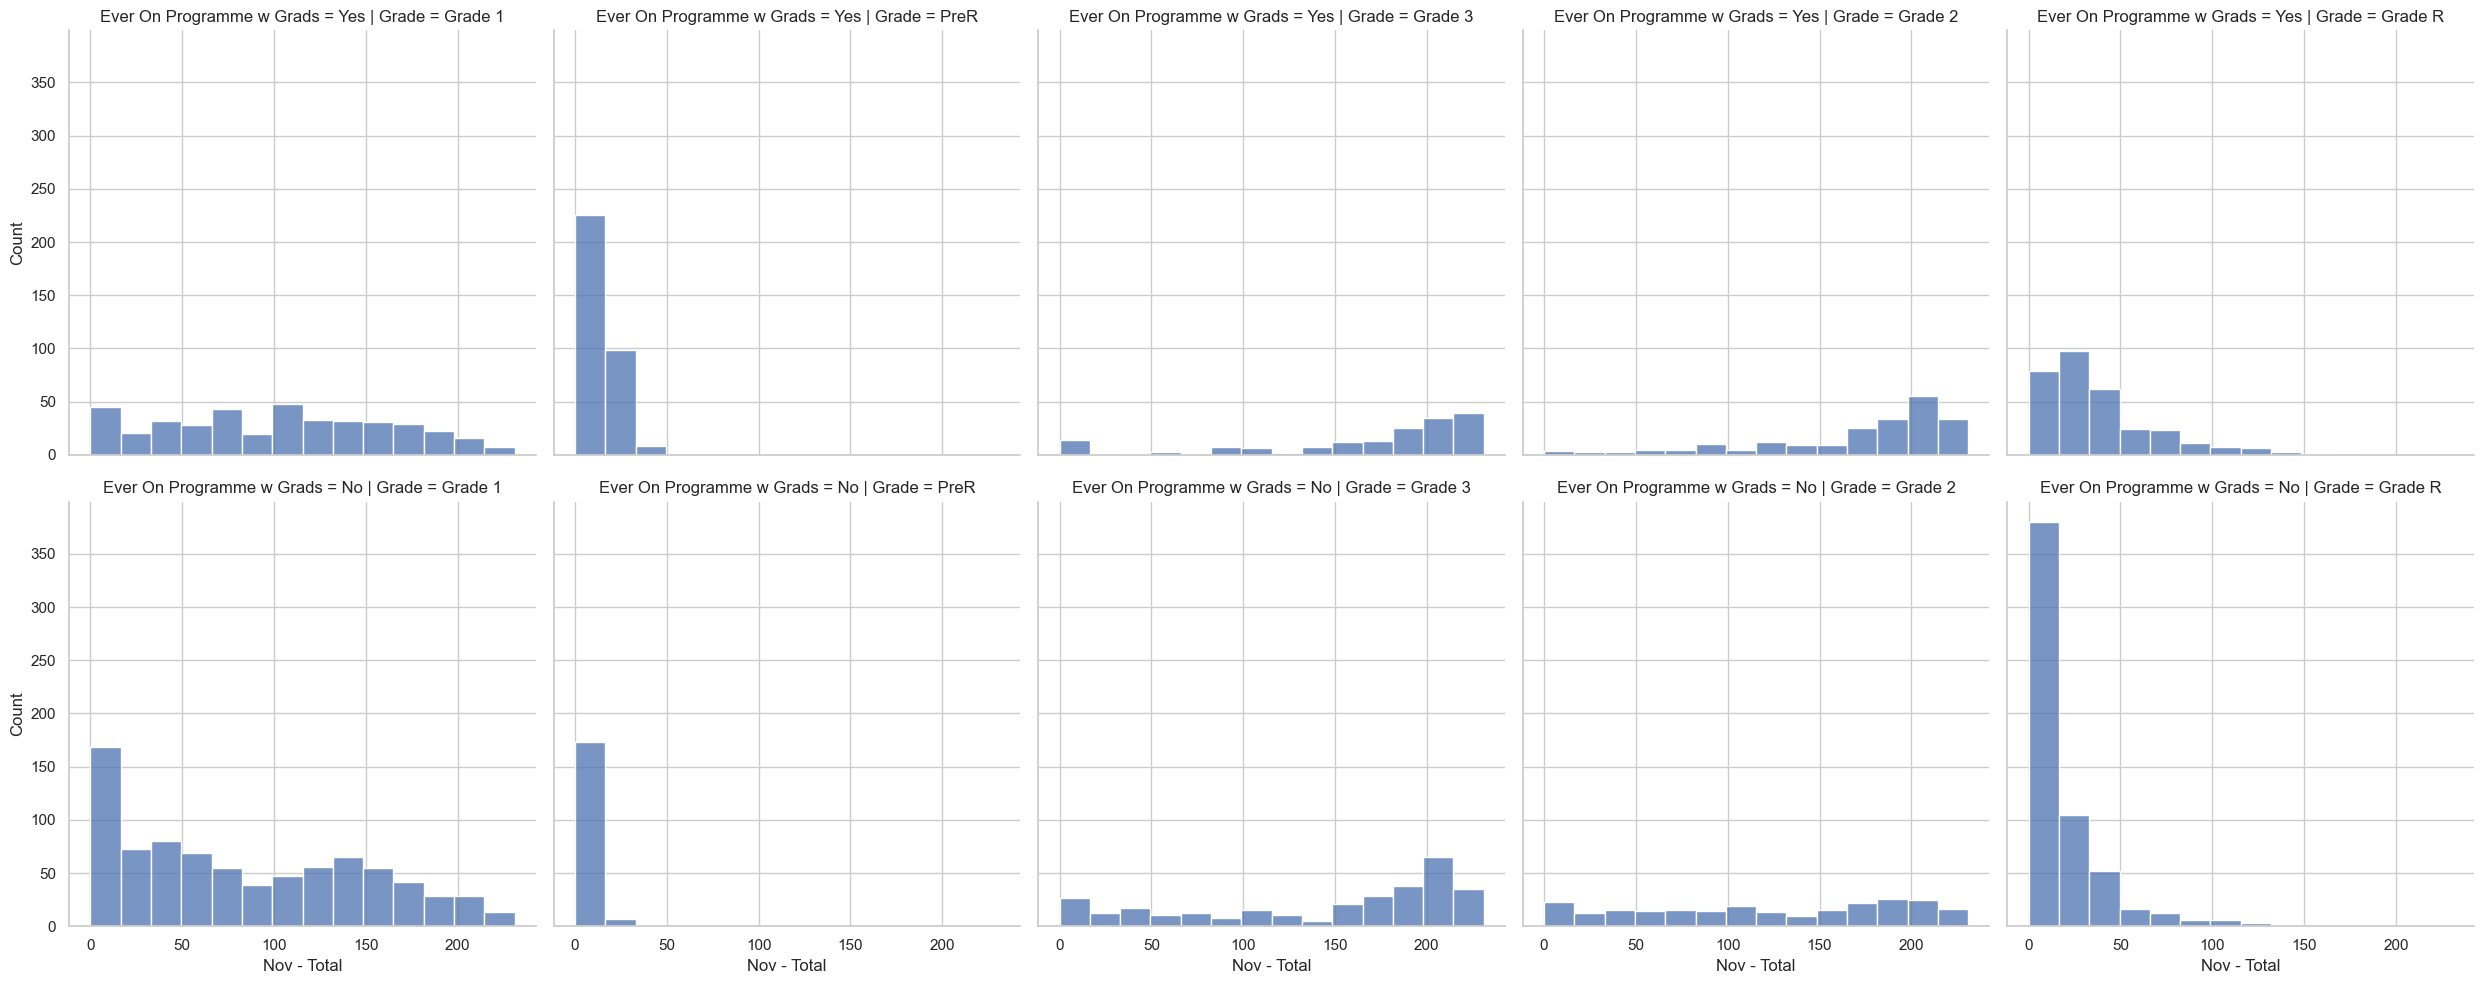

In [108]:
sns.displot(kind="hist", data=children, x="Nov - Total", col = "Grade", row="Ever On Programme w Grads")